# 1 - Introduction

Nama : Fredyco Rizky

Batch : FTDS-018-RMT

Dataset : [Dataset_Timeseries](https://github.com/ardhiraka/talent_fair_sample_challenge/tree/main/datasets)

Objective : The objective of the notebook project for time series weekly quantity is to analyze the historical trends and patterns of a given dataset, in order to identify insights and predict future quantity values with a high degree of accuracy. The project aims to use various statistical and machine learning techniques to build time series forecasting models that can account for seasonality, trends, and any other factors that may impact the quantity data. The project also seeks to explore different feature engineering techniques and hyperparameter tuning strategies to improve the accuracy and robustness of the models. The ultimate goal is to provide actionable insights that can inform decision-making and help stakeholders optimize resource allocation and planning.

## 1.1 - What is Time Series? Stats and Facts:
Time Series refers to a sequence of data points collected over time, typically at regular intervals. Examples of Time Series data include stock prices, weather patterns, and weekly sales figures. Time Series analysis involves studying the patterns and trends within the data to identify insights and make predictions about future values.

## 1.2 Metrics of Evaluation. MAE:
MAE stands for Mean Absolute Error and is a commonly used metric for evaluating the performance of regression models, including those used for Time Series analysis.

MAE measures the average magnitude of errors between predicted and actual values in a dataset. It is calculated by taking the absolute value of the difference between predicted and actual values and then averaging those absolute differences across all data points.

When using MAE to evaluate a Time Series model, the goal is to minimize the average absolute difference between the predicted and actual values. A low MAE indicates that the model is making accurate predictions, while a high MAE suggests that the model is not performing well.

# 2 - Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error

#save model
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # Atur agar semua kolom ter load

# 3 - Data Loading

load data and kept it into variable df

In [2]:
df = pd.read_csv('sample_dataset_timeseries_noarea.csv')

Copy the data into a variable named df1 to ensure that the data is preserved in case of errors or issues with the original data stored in the variable df.

In [3]:
df1=df.copy()

cek info of variable df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


# 4 - EDA

## 4.1 - Data Checking

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Based on the exploration of the variable df, we can see that it contains 102,733 rows of data and 5 columns. It's important to note that this is a large dataset that may require additional processing and optimization in order to be effectively analyzed.

Additionally, there are missing values in the "product_item" column, specifically two missing values out of the total 102,733 rows. Depending on the context and the goals of the analysis, missing values can have a significant impact on the accuracy and reliability of any results obtained from this dataset.

## 4.2 - `quantity`

Calculates and prints the mean, minimum, maximum, and mode of the 'quantity' column in the data. This information provides insight into the central tendency and variability of the quantity values in the dataset. The mean quantity tells us the average amount sold, while the minimum and maximum quantities show the range of values.

In [6]:
mean_quantity = df['quantity'].mean()
min_quantity = df['quantity'].min()
max_quantity = df['quantity'].max()
mode_quantity = df['quantity'].mode()[0]

In [7]:
print("Mean quantity:", mean_quantity)
print("Min quantity:", min_quantity)
print("Max quantity:", max_quantity)
print("Mode quantity:", mode_quantity)

Mean quantity: 3191.5624190863696
Min quantity: 0
Max quantity: 774732
Mode quantity: 4


The mean quantity is 3191.56, which means that on average, the quantity of products sold per week is around 3191. The minimum quantity sold per week is 0, which may indicate weeks where no sales were made for certain products. The maximum quantity sold per week is 774732, which is significantly higher than the mean and may indicate periods of high demand or successful promotions. The mode quantity is 4, which means that the quantity 4 occurs most frequently in the dataset, indicating that there are many weeks where only a small number of products were sold.

## 4.3 - `week_number`

Check range date of the data.

In [8]:
df["week_number"].unique()

array(['2021-52', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
       '2022-12', '2022-13', '2022-14', '2022-15', '2022-16', '2022-17',
       '2022-18', '2022-19', '2022-20', '2022-21', '2022-22', '2022-23',
       '2022-24', '2022-25', '2022-26', '2022-27', '2022-28', '2022-29',
       '2022-30', '2022-31', '2022-32', '2022-33', '2022-34', '2022-35',
       '2022-36', '2022-37', '2022-38', '2022-39', '2022-40', '2022-41',
       '2022-42', '2022-43', '2022-44', '2022-45', '2022-46', '2022-47',
       '2022-48', '2022-49', '2022-50', '2022-51', '2022-52', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2023-13',
       '2023-14'], dtype=object)

Date of data spans from the 52nd week of 2021 to the 14th week of 2023. It appears that the data is recorded on a weekly basis, with each row in the `df["week_number"]` representing a week of data for a particular product item.

In [9]:
grouped_df_week = df.groupby('week_number')['quantity'].sum().reset_index()
grouped_df_week_top = grouped_df_week.sort_values('quantity', ascending=False)[:5]
grouped_df_week_bot = grouped_df_week.sort_values('quantity', ascending=True)[:5]

Make a code to identify the top and bottom sales weeks by grouping the data by week number and calculating the total quantity sold for each week. This information can provide valuable insights into sales trends and help identify areas where sales can be improved. The top 5 and bottom 5 weeks based on the quantity sold are then extracted from the grouped data to provide a more focused analysis. By doing this, the code can help businesses make informed decisions to optimize their sales strategies and improve their overall performance.

In [10]:
grouped_df_week_top

,week_number,quantity
19,2022-19,7172144
23,2022-23,6260083
32,2022-32,6256332
31,2022-31,6143352
35,2022-35,6112693


It appears that the top 5 sales weeks occurred in the second quarter of 2022, with week 19 having the highest sales at 7,172,144. This could suggest a period of high demand for the products being sold during this time. 

In [11]:
grouped_df_week_bot

,week_number,quantity
0,2021-52,128808
18,2022-18,1334134
59,2023-07,3731588
61,2023-09,3732954
1,2022-01,3839557


The bottom 5 sales weeks, based on the quantity sold, show a significant drop in sales compared to the top 5 weeks. 

## 4.4 - `product_item`

Check how many unique item in product_item columns.

In [12]:
len(df["product_item"].unique())

2310

This code calculates the total quantity of all products, and then identifies the top 5 and bottom 5 products based on their total quantity sold. This information can be useful for identifying the most and least popular products.

In [13]:
total_quantity = df['quantity'].sum()
top_5_items = df.groupby('product_item')['quantity'].sum().nlargest(5)
bot_5_items = df.groupby('product_item')['quantity'].sum().nsmallest(5)

Calculate total quantity from 52nd week of 2021 to the 14th week of 2023.

In [14]:
print("Total quantity:", total_quantity)

Total quantity: 327878782


In [15]:
print("TOP 5 ITEMS BASED ON QUANTITY")
print(top_5_items)

TOP 5 ITEMS BASED ON QUANTITY
product_item
2949ca4cfbf13969bccfbb9817f2526a    18206376
2db7ed9bd7573aec037aac59237cb3dd     9122007
160eb16a7369a645ec75caa3f14543d4     6771207
229a936943f7da9feea525f1a48d1d03     6658518
0f9d1e065ad64ecd7237084107a4bfbd     4202082
Name: quantity, dtype: int64


The top 5 items based on quantity are listed above, with the item "2949ca4cfbf13969bccfbb9817f2526a" having the highest quantity sold at 18,206,376.

In [16]:
print("BOT 5 ITEMS BASED ON QUANTITY")
print(bot_5_items)

BOT 5 ITEMS BASED ON QUANTITY
product_item
06fd73444a38e1d15daf3f6e6daf518c    2
102b199abe02be34a24fca0827fd3f4a    2
133de2c5e2dd49e6f2e4e392a93f9c84    2
16abcdb5ccdb958db0e3116e33501093    2
1c668b91d9207e5d798b5277fc6c4c16    2
Name: quantity, dtype: int64


It seems like all the bottom product_item based on quantity are product_item that only has 2 quantity.

Check how many time each product appear in dataset.

In [17]:
df["product_item"].value_counts().unique()

array([67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51,
       50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

After explorations we found that there are product that appear in every single week or appear 67 time and product that appear only 1 time.

# 5 - Feature Engineering

## 5.1 - Data Cleaning

Check if there are any columns that has missing values.

In [18]:
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

From the output, it can be observed that there are 2 missing values in the product_item column. All the other columns have 0 missing values.

check the missing values in `df["product_item"]`

In [19]:
df[df["product_item"].isnull()]

,week_number,week_start_date,week_end_date,product_item,quantity
18048,2022-12,2022-03-21,2022-03-27,NaN,119
19536,2022-13,2022-03-28,2022-04-03,NaN,147


In order to simplify the data processing, missing values can be dropped since they do not have a clear relationship between one data point and another.

In [20]:
df = df.dropna()

## 5.2 - Data Formating

Converting data format from object to date is important because date is a more structured and standardized format that can be easily analyzed and manipulated. It allows us to perform time-based analysis, such as grouping data by month, week or day, calculating time differences between dates, and creating time series plots.

Moreover, converting date columns from object to datetime format will make it easier to perform operations with these columns, such as sorting or filtering by date. It will also prevent errors that may occur when working with date values in a string format.

In [21]:
# Convert the week dates to datetime objects
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

## 5.3 - Filling Data

Since there are product_items that do not appear in all weeks, to simplify the model creation process, I will assume that product_items that do not appear in a certain week will have a quantity of 0. Therefore, I will fill the missing data in df with the product_items that do not appear in a certain week with a quantity of 0. This is done to include all product_items that appear in every week.

In [22]:
week_dates = pd.date_range(pd.to_datetime('2021-12-27'), pd.to_datetime('2023-04-04'), freq='W-MON')

This code generates a sequence of weekly dates from '2021-12-27' to '2023-04-04' every Monday, The resulting sequence of weekly dates is stored in the week_dates variable, which can be used for various purposes such as creating new time-series data or grouping data by week.

In [23]:
product_items = np.unique(df['product_item'].astype(str))
df_full = pd.MultiIndex.from_product([week_dates, product_items], names=['week_date', 'product_item']).to_frame(index=False)

The code above is creating a new DataFrame called df_full that contains all possible combinations of week_dates and product_items.

In [24]:
# Merge the original DataFrame with the new DataFrame and fill in the missing values with zeros
df_merged = pd.merge(df_full, df, how='left', left_on=['week_date', 'product_item'], right_on=['week_start_date', 'product_item'])
df_merged['quantity'] = df_merged['quantity'].fillna(0)

the code is merging the original DataFrame with a new DataFrame to fill in the missing values with zeros.

In [25]:
# Group the DataFrame by week dates and product items and sum the quantities
df_final = df_merged.groupby(['week_date', 'product_item']).sum().reset_index()

This code groups the merged DataFrame by the week dates and product items, and calculates the sum of the quantities for each group. It then resets the index of the DataFrame to a default index, and stores the result in a new DataFrame called `df_final`.

In [26]:
pivot_df = df_final.pivot_table(index='product_item', columns='week_date', values='quantity', fill_value=0)

In [27]:
pivot_df

week_date,2021-12-27,2022-01-03,2022-01-10,2022-01-17,2022-01-24,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28,2022-04-04,2022-04-11,2022-04-18,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15,2022-08-22,2022-08-29,2022-09-05,2022-09-12,2022-09-19,2022-09-26,2022-10-03,2022-10-10,2022-10-17,2022-10-24,2022-10-31,2022-11-07,2022-11-14,2022-11-21,2022-11-28,2022-12-05,2022-12-12,2022-12-19,2022-12-26,2023-01-02,2023-01-09,2023-01-16,2023-01-23,2023-01-30,2023-02-06,2023-02-13,2023-02-20,2023-02-27,2023-03-06,2023-03-13,2023-03-20,2023-03-27,2023-04-03
product_item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00450b4fde94b528b4255b4f6f51599d,0,329,194,163,224,339,570,404,269,94,265,217,270,326,404,443,471,518,69,497,281,331,249,362,338,449,233,74,15,47,287,627,480,492,485,540,519,568,432,293,365,394,335,393,387,344,87,28,17,21,34,31,0,7,3,12,8,12,20,7,5,7,4,2,0,0,0
0065e8b533cd2c8273529312a6e8f219,0,411,441,337,376,486,653,364,358,270,549,402,464,388,511,423,691,814,215,1094,635,950,940,832,808,1027,1046,1210,1576,1349,1843,1685,1103,558,542,628,814,1140,251,66,443,56,51,80,65,68,32,49,50,31,33,44,27,28,27,0,0,0,0,0,0,0,0,0,0,0,0
0073377087c7ddace313ff829cd7b0b3,41,461,486,406,452,368,423,276,239,253,292,273,205,240,272,131,82,88,28,159,108,82,109,81,80,45,52,68,23,107,311,405,271,234,182,173,158,248,290,281,129,118,84,73,75,126,62,52,71,50,35,16,26,78,35,23,11,5,15,9,7,21,6,22,4,5,4
0098d23d332c193a07eabaf0f703d4e5,0,3345,3363,2952,2887,2644,2935,2819,2140,2469,3110,2914,2847,4028,3440,3549,5243,4885,899,7113,4655,3862,3648,4493,4293,3957,3309,4313,4661,5090,4085,4153,4176,2919,3399,3666,2394,2579,2478,2398,2223,2569,2383,2457,2554,3183,2550,3118,3246,3520,3400,4090,2838,2472,3166,2796,2603,3214,2432,1794,2319,2482,3039,2725,2957,3523,2869
009e12e8fd2ef0b77047206e939fc6b9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,254,186,242,516,1163,1246,1159,879,1051,1383,1573,1097,913,908,814,898,1024,843,746,914,945,1260,1090,982,1019,1057,1052,1438,1378,1449,1418,1112,986,931,777,642,492,337,404,464,528,391,335,574,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff92741956851dca5a1daafeef1d9dd7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ff9d05a4d6f922b3ab1653f58165b8ce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
ffbd6f1d884056a4f622d54ae79e5a14,537,40975,47080,68171,112978,69418,54393,48260,57826,74586,96922,81204,100600,84179,9711,8853,15659,14312,4748,48514,36038,39223,38058,50193,48258,61198,49366,51746,53290,97247,96368,45227,64234,61629,49784,56097,48506,48354,42218,46520,49023,52337,47202,45656,48050,63767,48285,51203,52517,68442,59393,62710,50494,46230,56353,58559,45510,53419,60451,35400,39481,40263,47735,63840,54501,66679,42920


Creating a pivot table that shows the quantity of each product for each week date.

## 5.4 - Split into Train and test

In [28]:
train_set = pivot_df.iloc[:, 0:53]
test_set = pivot_df.iloc[:, 53:]

This code is splitting a dataset into a training set and a testing set. The dataset is represented as a pivot table, where the rows correspond to product items and the columns correspond to dates. The training set contains the data from the first 53 columns (representing 53 weeks), while the testing set contains the data from the remaining columns. 

In [29]:
train_set

week_date,2021-12-27,2022-01-03,2022-01-10,2022-01-17,2022-01-24,2022-01-31,2022-02-07,2022-02-14,2022-02-21,2022-02-28,2022-03-07,2022-03-14,2022-03-21,2022-03-28,2022-04-04,2022-04-11,2022-04-18,2022-04-25,2022-05-02,2022-05-09,2022-05-16,2022-05-23,2022-05-30,2022-06-06,2022-06-13,2022-06-20,2022-06-27,2022-07-04,2022-07-11,2022-07-18,2022-07-25,2022-08-01,2022-08-08,2022-08-15,2022-08-22,2022-08-29,2022-09-05,2022-09-12,2022-09-19,2022-09-26,2022-10-03,2022-10-10,2022-10-17,2022-10-24,2022-10-31,2022-11-07,2022-11-14,2022-11-21,2022-11-28,2022-12-05,2022-12-12,2022-12-19,2022-12-26
product_item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00450b4fde94b528b4255b4f6f51599d,0,329,194,163,224,339,570,404,269,94,265,217,270,326,404,443,471,518,69,497,281,331,249,362,338,449,233,74,15,47,287,627,480,492,485,540,519,568,432,293,365,394,335,393,387,344,87,28,17,21,34,31,0
0065e8b533cd2c8273529312a6e8f219,0,411,441,337,376,486,653,364,358,270,549,402,464,388,511,423,691,814,215,1094,635,950,940,832,808,1027,1046,1210,1576,1349,1843,1685,1103,558,542,628,814,1140,251,66,443,56,51,80,65,68,32,49,50,31,33,44,27
0073377087c7ddace313ff829cd7b0b3,41,461,486,406,452,368,423,276,239,253,292,273,205,240,272,131,82,88,28,159,108,82,109,81,80,45,52,68,23,107,311,405,271,234,182,173,158,248,290,281,129,118,84,73,75,126,62,52,71,50,35,16,26
0098d23d332c193a07eabaf0f703d4e5,0,3345,3363,2952,2887,2644,2935,2819,2140,2469,3110,2914,2847,4028,3440,3549,5243,4885,899,7113,4655,3862,3648,4493,4293,3957,3309,4313,4661,5090,4085,4153,4176,2919,3399,3666,2394,2579,2478,2398,2223,2569,2383,2457,2554,3183,2550,3118,3246,3520,3400,4090,2838
009e12e8fd2ef0b77047206e939fc6b9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,254,186,242,516,1163,1246,1159,879,1051,1383,1573,1097,913,908,814,898,1024,843,746,914,945,1260,1090,982,1019,1057,1052,1438,1378,1449,1418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff92741956851dca5a1daafeef1d9dd7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ff9d05a4d6f922b3ab1653f58165b8ce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffbd6f1d884056a4f622d54ae79e5a14,537,40975,47080,68171,112978,69418,54393,48260,57826,74586,96922,81204,100600,84179,9711,8853,15659,14312,4748,48514,36038,39223,38058,50193,48258,61198,49366,51746,53290,97247,96368,45227,64234,61629,49784,56097,48506,48354,42218,46520,49023,52337,47202,45656,48050,63767,48285,51203,52517,68442,59393,62710,50494


In [30]:
test_set

week_date,2023-01-02,2023-01-09,2023-01-16,2023-01-23,2023-01-30,2023-02-06,2023-02-13,2023-02-20,2023-02-27,2023-03-06,2023-03-13,2023-03-20,2023-03-27,2023-04-03
product_item,,,,,,,,,,,,,,
00450b4fde94b528b4255b4f6f51599d,7,3,12,8,12,20,7,5,7,4,2,0,0,0
0065e8b533cd2c8273529312a6e8f219,28,27,0,0,0,0,0,0,0,0,0,0,0,0
0073377087c7ddace313ff829cd7b0b3,78,35,23,11,5,15,9,7,21,6,22,4,5,4
0098d23d332c193a07eabaf0f703d4e5,2472,3166,2796,2603,3214,2432,1794,2319,2482,3039,2725,2957,3523,2869
009e12e8fd2ef0b77047206e939fc6b9,1112,986,931,777,642,492,337,404,464,528,391,335,574,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff92741956851dca5a1daafeef1d9dd7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ff9d05a4d6f922b3ab1653f58165b8ce,0,0,0,0,0,0,0,0,0,0,0,0,0,16
ffbd6f1d884056a4f622d54ae79e5a14,46230,56353,58559,45510,53419,60451,35400,39481,40263,47735,63840,54501,66679,42920


## 5.5 - Scalling

MinMaxScaler is often used to normalize data before clustering or other analysis techniques are applied. This is because it scales the data to a range between 0 and 1, which can be useful in cases where the range of values for different variables is very different. Normalizing the data in this way can help to ensure that all variables have equal weighting in the analysis and that small changes in one variable have the same impact as small changes in another variable.

In [31]:
scaler = MinMaxScaler()
scaler.fit(train_set)

MinMaxScaler()

In [32]:
df_scl = scaler.transform(train_set)

## 5.6 - Clustering

Clustering the products based on their weekly quantity trend before creating a time series model can simplify the modeling process and reduce the number of distinct patterns in the data. So I will use 2 kinds of data in this project, first data with clustering product and data that not cluster per product.

By grouping similar products together, we can gain insights into the underlying factors that drive demand and identify potential opportunities for optimization or improvement. Moreover, clustering can also improve the accuracy of our time series models by reducing noise and variability in the data. By removing products that do not follow the same trend as others, we can focus our modeling efforts on products that are more predictable and easier to forecast.

Using both clustered and unclustered data, we can develop a comprehensive and accurate time series model that captures the demand patterns of different products. This approach can save time and computational resources, especially when dealing with a large number of products. It can also lead to more accurate and reliable predictions, which can help companies make better-informed decisions and improve their bottom line.

### 5.6.1 - Clustering With Elbow Method

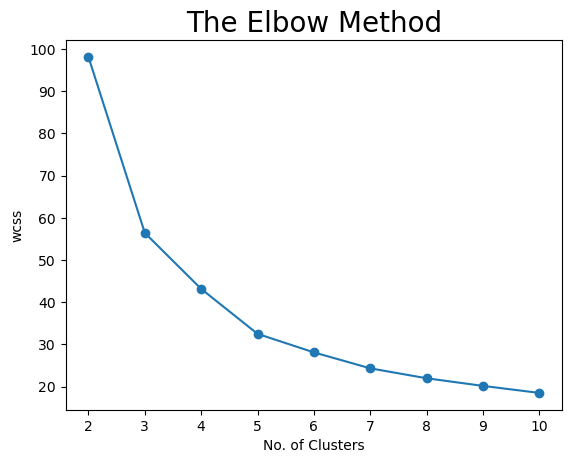

In [33]:
wcss = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(df_scl)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Based on the results of the elbow method, it can be concluded that increasing the number of clusters beyond 5 would result in diminishing returns in terms of improving the within-cluster sum of squares. Therefore, I'm going to use 5 clusters for the given dataset.

### 5.6.2 Cluster Model Definition and Predict

Define model cluster with data that already got scalled.

In [34]:
km= KMeans(n_clusters=5, random_state=24)
km.fit(df_scl)

KMeans(n_clusters=5, random_state=24)

predict cluster

In [35]:
cluster_data = km.predict(df_scl)

### 5.6.3 - Cluster Evaluation

add result of clustering into train-set and test-set

In [36]:
train_set["cluster"] = cluster_data
test_set["cluster"] = cluster_data

In [37]:
cls_0 = train_set[train_set["cluster"] == 0]
cls_1 = train_set[train_set["cluster"] == 1]
cls_2 = train_set[train_set["cluster"] == 2]
cls_3 = train_set[train_set["cluster"] == 3]
cls_4 = train_set[train_set["cluster"] == 4]

In [38]:
cls_0.describe()

week_date,2021-12-27 00:00:00,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00,2022-04-04 00:00:00,2022-04-11 00:00:00,2022-04-18 00:00:00,2022-04-25 00:00:00,2022-05-02 00:00:00,2022-05-09 00:00:00,2022-05-16 00:00:00,2022-05-23 00:00:00,2022-05-30 00:00:00,2022-06-06 00:00:00,2022-06-13 00:00:00,2022-06-20 00:00:00,2022-06-27 00:00:00,2022-07-04 00:00:00,2022-07-11 00:00:00,2022-07-18 00:00:00,2022-07-25 00:00:00,2022-08-01 00:00:00,2022-08-08 00:00:00,2022-08-15 00:00:00,2022-08-22 00:00:00,2022-08-29 00:00:00,2022-09-05 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-26 00:00:00,2022-10-03 00:00:00,2022-10-10 00:00:00,2022-10-17 00:00:00,2022-10-24 00:00:00,2022-10-31 00:00:00,2022-11-07 00:00:00,2022-11-14 00:00:00,2022-11-21 00:00:00,2022-11-28 00:00:00,2022-12-05 00:00:00,2022-12-12 00:00:00,2022-12-19 00:00:00,2022-12-26 00:00:00,cluster
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.0
mean,14.328060,682.791996,707.304793,618.937180,646.803164,568.008841,646.668683,523.746394,516.921359,483.941833,710.185668,598.709167,639.090740,651.335505,649.562587,659.842252,841.035831,778.129828,181.699860,1147.624942,843.880409,825.071661,834.031177,870.654258,853.120987,826.723127,761.501163,753.822708,807.252676,746.084691,726.775710,864.793392,797.529083,676.973476,748.569567,720.198232,646.604467,648.112145,577.916705,652.166589,620.722196,690.471847,571.082829,602.251280,576.336901,622.764542,597.709632,574.523034,614.014891,757.699395,708.277804,785.697999,625.800372,0.0
std,85.926503,1637.779082,1911.665584,1805.769019,1754.761014,1400.195143,1622.738798,1293.569312,1338.632584,1212.695404,1848.322777,1634.617282,1845.560628,1763.886000,1572.831674,1730.994089,1834.498171,1580.769722,401.238694,2394.075504,1770.669373,1695.992762,1721.742331,1773.522592,2515.729767,1656.386341,1569.650450,1622.146716,1705.520901,1545.044091,1528.075097,1714.275543,1663.466047,1437.626968,1650.983041,1524.015014,1305.798411,1311.884888,1219.166648,1616.427247,1459.375042,1505.846035,1305.022033,1248.874004,1151.690317,1338.705675,1274.814989,1158.320488,1266.171405,1578.604298,1485.437296,1616.013765,1331.505164,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,59.000000,55.000000,46.000000,52.000000,39.000000,54.0000

In [39]:
cls_1.describe()

week_date,2021-12-27 00:00:00,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00,2022-04-04 00:00:00,2022-04-11 00:00:00,2022-04-18 00:00:00,2022-04-25 00:00:00,2022-05-02 00:00:00,2022-05-09 00:00:00,2022-05-16 00:00:00,2022-05-23 00:00:00,2022-05-30 00:00:00,2022-06-06 00:00:00,2022-06-13 00:00:00,2022-06-20 00:00:00,2022-06-27 00:00:00,2022-07-04 00:00:00,2022-07-11 00:00:00,2022-07-18 00:00:00,2022-07-25 00:00:00,2022-08-01 00:00:00,2022-08-08 00:00:00,2022-08-15 00:00:00,2022-08-22 00:00:00,2022-08-29 00:00:00,2022-09-05 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-26 00:00:00,2022-10-03 00:00:00,2022-10-10 00:00:00,2022-10-17 00:00:00,2022-10-24 00:00:00,2022-10-31 00:00:00,2022-11-07 00:00:00,2022-11-14 00:00:00,2022-11-21 00:00:00,2022-11-28 00:00:00,2022-12-05 00:00:00,2022-12-12 00:00:00,2022-12-19 00:00:00,2022-12-26 00:00:00,cluster
count,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,2261.000000,78892.333333,85702.000000,82158.000000,117020.00000,103221.333333,105374.000000,105953.000000,148705.333333,113784.333333,114852.000000,98806.000000,111912.000000,94654.000000,76188.000000,89838.00000,96194.000000,72147.666667,22683.000000,114615.666667,94780.000000,100001.000000,109867.333333,128732.000000,102972.00000,96359.666667,115831.666667,125572.333333,137012.000000,131014.666667,140591.000000,185577.333333,200126.666667,120520.000000,169630.000000,175655.000000,129791.000000,139347.333333,117305.000000,119530.666667,100982.333333,130806.000000,86409.000000,98071.333333,115253.666667,126774.000000,128170.666667,115830.666667,116861.666667,133032.000000,114210.666667,134641.000000,96262.666667,1.0
std,2159.955787,33274.391449,21454.821579,28477.903662,44500.84643,12367.543019,9704.692267,20928.678888,12517.821269,54397.705322,38550.619463,41998.171615,55535.189124,54539.644141,1518.003953,12785.64926,9391.690103,6428.710005,4351.532259,23695.065991,9437.371933,19437.896517,28821.724104,25901.782506,25390.93797,22514.511594,19753.134874,14302.802394,23557.961478,17781.342394,23483.116297,132824.277270,49981.441719,43947.008635,99171.865975,55494.847283,33304.505386,37207.468085,30039.385197,21139.144645,18186.878521,13933.255147,2220.560965,20176.939865,28834.680028,22759.437757,34351.406759,19755.954301,12631.399144,21799.352582,22126.355107,30548.353687,9254.323116,0.0
min,866.000000,45415.000000,62469.000000,56122.000000,70807.00000,90835.000000,94962.000000,93393.000000,134482.000000,51602.000000,83968.000000,74408.000000,73523.000000,60328.000000,74572.000000,75275.00000,86837.000000,65458.000000,17862.000000,91496.000000,84747.000000,86350.000000,92320.000000,98959.000000,81701.00000,82551.000000,93307.000000,109900.000000,109969.000000,114098.000000,117396.000000,97654.000000,155479.000000,92756.000000,101886.000000,114240.000000,106518.000000,116472.000000,88264.000000,98835.000000,86665.000000,120076.000000,84808.000000,78885.000000,98540.000000,108525.000000,99423.000000,94616.000000,105869.000000,112823.000000,93407.000000,107222.000000,86393.000000,1.0
25%,1017.000000,62358.500000,76169.500000,66951.500000,95738.00000,97047.000000,100977.000000,93873.000000,144035.000000,94394.000000,93249.500000,74558.500000,80072.500000,63209.500000,75490.000000,85147.00000,91481.000000,69082.000000,20864.500000,102500.000000,90430.000000,88873.500000,93235.500000,120056.0000

In [40]:
cls_2.describe()

week_date,2021-12-27 00:00:00,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00,2022-04-04 00:00:00,2022-04-11 00:00:00,2022-04-18 00:00:00,2022-04-25 00:00:00,2022-05-02 00:00:00,2022-05-09 00:00:00,2022-05-16 00:00:00,2022-05-23 00:00:00,2022-05-30 00:00:00,2022-06-06 00:00:00,2022-06-13 00:00:00,2022-06-20 00:00:00,2022-06-27 00:00:00,2022-07-04 00:00:00,2022-07-11 00:00:00,2022-07-18 00:00:00,2022-07-25 00:00:00,2022-08-01 00:00:00,2022-08-08 00:00:00,2022-08-15 00:00:00,2022-08-22 00:00:00,2022-08-29 00:00:00,2022-09-05 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-26 00:00:00,2022-10-03 00:00:00,2022-10-10 00:00:00,2022-10-17 00:00:00,2022-10-24 00:00:00,2022-10-31 00:00:00,2022-11-07 00:00:00,2022-11-14 00:00:00,2022-11-21 00:00:00,2022-11-28 00:00:00,2022-12-05 00:00:00,2022-12-12 00:00:00,2022-12-19 00:00:00,2022-12-26 00:00:00,cluster
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,478.000000,23541.307692,27282.205128,36276.820513,41220.923077,31106.435897,32382.384615,32109.025641,36715.230769,30952.384615,39100.743590,33290.846154,36911.666667,36046.692308,39223.282051,41489.769231,44674.102564,33683.615385,10643.666667,51018.487179,40570.282051,39533.128205,42354.487179,43973.153846,37792.128205,39085.435897,39062.384615,40991.487179,44537.666667,49298.282051,52364.153846,48144.948718,51386.641026,33956.256410,39651.538462,44888.230769,34692.717949,35588.487179,33549.769231,34149.769231,32718.974359,38029.615385,28817.871795,30274.564103,30104.641026,36760.384615,33095.153846,28966.358974,34321.051282,38065.358974,34895.615385,36391.282051,28325.564103,2.0
std,378.125362,12680.724957,14927.511232,32622.665551,28802.989317,17973.235602,17799.434708,19704.230973,23915.893784,20595.193771,21257.111795,18099.508024,20871.533389,20074.242267,20100.966154,18362.046864,19459.728512,13340.397192,4972.803013,15048.820781,11535.431306,12626.897098,15274.750071,14297.881627,13100.233058,12977.412421,11080.770671,18753.376159,17222.911732,22456.471805,29008.185440,27528.856206,23081.770777,12520.086812,13942.221983,22027.103047,20721.368853,21824.999532,21946.946076,23280.833649,23227.125015,27252.743592,18023.367076,19172.332823,21445.217865,23543.480633,19943.666109,17304.726418,21287.198162,20938.303833,19732.850291,19409.083987,15144.533441,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6168.000000,9711.000000,8853.000000,13857.000000,14312.000000,2246.000000,28549.000000,21758.000000,20705.000000,20968.000000,23691.000000,16506.000000,16026.000000,22041.000000,17775.000000,21161.000000,20089.000000,16629.000000,19602.000000,20296.000000,18605.000000,15449.000000,4746.000000,2984.000000,2668.000000,426.000000,173.000000,128.000000,92.000000,59.000000,11.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,183.500000,16859.500000,20033.500000,19071.000000,22016.000000,18922.000000,22665.500000,20058.500000,19955.500000,17100.500000,26443.000000,21014.500000,25169.500000,23261.500000,25538.000000,29073.500000,31082.500000,23588.000000,6879.000000,40014.000000,31606.000000,30863.000000,30479.000000,32687.500000,26768.500000,28287.500000,29976.000000,29183.500000,31628.500000,31511.500000,28843.500000

In [41]:
cls_3.describe()

week_date,2021-12-27 00:00:00,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00,2022-04-04 00:00:00,2022-04-11 00:00:00,2022-04-18 00:00:00,2022-04-25 00:00:00,2022-05-02 00:00:00,2022-05-09 00:00:00,2022-05-16 00:00:00,2022-05-23 00:00:00,2022-05-30 00:00:00,2022-06-06 00:00:00,2022-06-13 00:00:00,2022-06-20 00:00:00,2022-06-27 00:00:00,2022-07-04 00:00:00,2022-07-11 00:00:00,2022-07-18 00:00:00,2022-07-25 00:00:00,2022-08-01 00:00:00,2022-08-08 00:00:00,2022-08-15 00:00:00,2022-08-22 00:00:00,2022-08-29 00:00:00,2022-09-05 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-26 00:00:00,2022-10-03 00:00:00,2022-10-10 00:00:00,2022-10-17 00:00:00,2022-10-24 00:00:00,2022-10-31 00:00:00,2022-11-07 00:00:00,2022-11-14 00:00:00,2022-11-21 00:00:00,2022-11-28 00:00:00,2022-12-05 00:00:00,2022-12-12 00:00:00,2022-12-19 00:00:00,2022-12-26 00:00:00,cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.0,154304.0,206545.0,397831.0,375309.0,268620.0,381828.0,329949.0,161199.0,169027.0,188285.0,135631.0,53186.0,243425.0,186679.0,198660.0,481736.0,496556.0,490140.0,452848.0,481654.0,203864.0,203096.0,224995.0,312661.0,245329.0,291519.0,311887.0,285439.0,272704.0,244133.0,541135.0,518658.0,774732.0,191467.0,201418.0,194559.0,215541.0,225861.0,240542.0,223290.0,205633.0,251184.0,255984.0,272948.0,330927.0,386210.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.0,154304.0,206545.0,397831.0,375309.0,268620.0,381828.0,329949.0,161199.0,169027.0,188285.0,135631.0,53186.0,243425.0,186679.0,198660.0,481736.0,496556.0,490140.0,452848.0,481654.0,203864.0,203096.0,224995.0,312661.0,245329.0,291519.0,311887.0,285439.0,272704.0,244133.0,541135.0,518658.0,774732.0,191467.0,201418.0,194559.0,215541.0,225861.0,240542.0,223290.0,205633.0,251184.0,255984.0,272948.0,330927.0,386210.0,3.0
25%,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.0,154304.0,206545.0,397831.0,375309.0,268620.0,381828.0,329949.0,161199.0,169027.0,188285.0,135631.0,53186.0,243425.0,186679.0,198660.0,481736.0,496556.0,490140.0,452848.0,481654.0,203864.0,203096.0,224995.0,312661.0,245329.0,291519.0,311887.0,285439.0,272704.0,244133.0,541135.0,518658.0,774732.0,191467.0,201418.0,194559.0,215541.0,225861.0,240542.0,223290.0,205633.0,251184.0,255984.0,272948.0,330927.0,386210.0,3.0
50%,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.0,154304.0,206545.0,397831.0,375309.0,268620.0,381828.0,329949.0,161199.0,169027.0,188285.0,135631.0,53186.0,243425.0,186679.0,198660.0,481736.0,496556.0,490140.0,452848.0,481654.0,203864.0,203096.0,224995.0,312661.0,245329.0,291519.0,311887.0,285439.0,272704.0,244133.0,541135.0,518658.0,774732.0,191467.0,201418.0,194559.0,215541.0,225861.0,240542.0,223290.0,205633.0,251184.0,255984.0,272948.0,330927.0,386210.0,3.0
75%,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.0,154304.0,206545.0,397831.0,375309.0,268620.0,381828.0,329949.0,161199.0,169027.0,188285.0,135631.0,53186.0,243425.0,186679.0,198660.0,481736.0,496556.0,490140.0,452848.0,481654.0,203864.0,203096.0,224995.0,312661.0,245329.0,291519.0,311887.0,285439.0,272704.0,244133.0,541135.0,518658.0,774732.0,191467.0,201418.0,194559.0,215541.0,225861.0,240542.0,223290.0,205633.0,251184.0,255984.0,272948.0,330927.0,386210.0,3.0
max,56851.0,269285.0,196277.0,210053.0,284402.0,240575.0,202214.

In [42]:
cls_4.describe()

week_date,2021-12-27 00:00:00,2022-01-03 00:00:00,2022-01-10 00:00:00,2022-01-17 00:00:00,2022-01-24 00:00:00,2022-01-31 00:00:00,2022-02-07 00:00:00,2022-02-14 00:00:00,2022-02-21 00:00:00,2022-02-28 00:00:00,2022-03-07 00:00:00,2022-03-14 00:00:00,2022-03-21 00:00:00,2022-03-28 00:00:00,2022-04-04 00:00:00,2022-04-11 00:00:00,2022-04-18 00:00:00,2022-04-25 00:00:00,2022-05-02 00:00:00,2022-05-09 00:00:00,2022-05-16 00:00:00,2022-05-23 00:00:00,2022-05-30 00:00:00,2022-06-06 00:00:00,2022-06-13 00:00:00,2022-06-20 00:00:00,2022-06-27 00:00:00,2022-07-04 00:00:00,2022-07-11 00:00:00,2022-07-18 00:00:00,2022-07-25 00:00:00,2022-08-01 00:00:00,2022-08-08 00:00:00,2022-08-15 00:00:00,2022-08-22 00:00:00,2022-08-29 00:00:00,2022-09-05 00:00:00,2022-09-12 00:00:00,2022-09-19 00:00:00,2022-09-26 00:00:00,2022-10-03 00:00:00,2022-10-10 00:00:00,2022-10-17 00:00:00,2022-10-24 00:00:00,2022-10-31 00:00:00,2022-11-07 00:00:00,2022-11-14 00:00:00,2022-11-21 00:00:00,2022-11-28 00:00:00,2022-12-05 00:00:00,2022-12-12 00:00:00,2022-12-19 00:00:00,2022-12-26 00:00:00,cluster
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,134.538462,8103.965812,9414.931624,8099.641026,10181.324786,8752.017094,9744.188034,8826.410256,9069.418803,7670.871795,10913.803419,9856.350427,12395.179487,10262.871795,10584.085470,12364.914530,14890.632479,11507.547009,3481.393162,18195.769231,14007.324786,13514.974359,13348.179487,15310.615385,14131.564103,14248.256410,13396.863248,12621.153846,13643.760684,14367.393162,13349.700855,13719.632479,14072.341880,13410.914530,16829.760684,17219.461538,15909.880342,15512.623932,16427.837607,17484.017094,15407.589744,14608.136752,12177.982906,16186.188034,14338.358974,15741.358974,14348.965812,13230.324786,14473.410256,16666.461538,15047.880342,16460.205128,13277.410256,4.0
std,177.844253,5907.704651,6817.001049,7524.202490,9464.329956,7183.845463,8094.197972,8972.418012,8546.224768,6304.008576,7914.539542,7257.562020,14696.417457,7640.155510,7123.893834,7906.469748,8825.040571,6848.889333,3072.157893,9680.528220,8015.673938,8228.577540,8525.501400,9880.003903,8766.930860,8972.368313,8572.518222,7755.582792,9689.885088,11215.215170,9552.870198,9129.252778,9784.041803,10633.253211,18175.531924,17500.498924,14452.325484,12934.367057,21025.635898,19407.858012,18370.610944,13189.383475,11200.000209,22715.175094,14070.472115,14246.727577,12857.773717,11545.560898,11914.704739,13690.039275,13619.092046,12517.681173,10436.496507,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,4.0
25%,0.000000,4622.000000,5763.000000,4221.000000,4720.000000,4916.000000,5820.000000,4649.000000,4876.000000,4131.000000,6710.000000,6497.000000,6644.000000,6047.000000,6531.000000,7084.000000,9532.000000,7511.000000,1918.000000,12576.000000,9313.000000,9039.000000,8812.000000,9724.000000,8322.000000,8394.000000,7734.000000,7740.000000,8395.000000,8113.000000,7401.000000,8298.000000,8387.000000,7697.000000,8368.000000,8833.000000,7120.000000,7769.000000,6625.000000,6934.000000,6471.000

From the data, we can gather that the cluster with the highest average product quantity per week is cluster 3, followed by cluster 1 and cluster 2. On the other hand, the cluster with the lowest average product quantity per week is cluster 0. Therefore, to increase the weekly quantity output, we should maintain and improve the products in clusters 3, 1, and 2, while promoting the products in cluster 0, since they still have a very low average quantity. Although the average quantity value in cluster 4 is not as high as in clusters 3, 1, and 2, the value in cluster 4 is still relatively high compared to the average value in cluster 0.

## 5.7 - Grouped train and test

By grouping all 2300 product items into a single sum of quantity per week, we can create a more manageable dataset that is easier to work with. Analyzing each product item individually would be time-consuming and computationally demanding, and could potentially lead to overfitting and inaccurate results. Summing the quantity for all product items for each week allows us to create a single data point for each week, which simplifies the data analysis process and allows us to focus on overall trends and patterns in the data.

### 5.7.1 - Train set

#### 5.7.1.1 Total

Group all quantities into a single row of data for each week.

In [43]:
total_train = train_set.drop(['cluster'], axis=1).sum()
total_train = total_train.reset_index()
total_train = total_train.set_index("week_date")

In [44]:
mean_quantity = total_train[0].mean()
min_quantity = total_train[0].min()
max_quantity = total_train[0].max()

print("Mean quantity:", mean_quantity)
print("Min quantity:", min_quantity)
print("Max quantity:", max_quantity)

Mean quantity: 4978912.415094339
Min quantity: 128808
Max quantity: 7172144


Based on the provided data, we can see that the mean weekly quantity is 4,978,912. This indicates that on average, the business produces almost 5 million units of product per week. However, the minimum weekly quantity is 128,808, which is significantly lower than the mean. This suggests that there are weeks where the production output is much lower than usual.

On the other hand, the maximum weekly quantity is 7,172,144, which is significantly higher than the mean. This indicates that there are weeks where the production output is much higher than usual.

#### 5.7.1.2 Cluster

Group quantities based on clusters for each week.

In [45]:
cls_0 = train_set[train_set["cluster"] == 0].drop(['cluster'], axis=1)
cls_1 = train_set[train_set["cluster"] == 1].drop(['cluster'], axis=1)
cls_2 = train_set[train_set["cluster"] == 2].drop(['cluster'], axis=1)
cls_3 = train_set[train_set["cluster"] == 3].drop(['cluster'], axis=1)
cls_4 = train_set[train_set["cluster"] == 4].drop(['cluster'], axis=1)

In [46]:
cls_0_train = cls_0.sum()
cls_0_train = cls_0_train.reset_index()
cls_0_train = cls_0_train.set_index("week_date")

In [47]:
cls_1_train = cls_1.sum()
cls_1_train = cls_1_train.reset_index()
cls_1_train = cls_1_train.set_index("week_date")

In [48]:
cls_2_train = cls_2.sum()
cls_2_train = cls_2_train.reset_index()
cls_2_train = cls_2_train.set_index("week_date")

In [49]:
cls_3_train = cls_3.sum()
cls_3_train = cls_3_train.reset_index()
cls_3_train = cls_3_train.set_index("week_date")

In [50]:
cls_4_train = cls_4.sum()
cls_4_train = cls_4_train.reset_index()
cls_4_train = cls_4_train.set_index("week_date")

### 5.7.2 - Test set

#### 5.7.2.1 Total

Group all quantities into a single row of data for each week.

In [51]:
total_test = test_set.drop(['cluster'], axis=1).sum()
total_test = total_test.reset_index()
total_test = total_test.set_index("week_date")

In [52]:
mean_quantity = total_test[0].mean()
min_quantity = total_test[0].min()
max_quantity = total_test[0].max()

print("Mean quantity:", mean_quantity)
print("Min quantity:", min_quantity)
print("Max quantity:", max_quantity)

Mean quantity: 4571154.142857143
Min quantity: 3731588
Max quantity: 6001166


Based on the information provided, it appears that the mean quantity in the test set is lower than that in the training set. This may suggest that the model may struggle to accurately predict the quantity in the test set, as it has not encountered such low values during training. Additionally, the minimum and maximum quantities in the test set are also lower than those in the training set, indicating that the test set may contain different patterns or behaviors than the training set. This highlights the importance of evaluating a model's performance on a diverse range of data, to ensure that it can generalize well to new and unseen scenarios.

#### 5.7.2.2 Cluster

Group quantities based on clusters for each week.

In [53]:
cls_0_s = test_set[test_set["cluster"] == 0].drop(['cluster'], axis=1)
cls_1_s = test_set[test_set["cluster"] == 1].drop(['cluster'], axis=1)
cls_2_s = test_set[test_set["cluster"] == 2].drop(['cluster'], axis=1)
cls_3_s = test_set[test_set["cluster"] == 3].drop(['cluster'], axis=1)
cls_4_s = test_set[test_set["cluster"] == 4].drop(['cluster'], axis=1)

In [54]:
cls_0_test = cls_0_s.sum()
cls_0_test = cls_0_test.reset_index()
cls_0_test = cls_0_test.set_index("week_date")

In [55]:
cls_1_test = cls_1_s.sum()
cls_1_test = cls_1_test.reset_index()
cls_1_test = cls_1_test.set_index("week_date")

In [56]:
cls_2_test = cls_2_s.sum()
cls_2_test = cls_2_test.reset_index()
cls_2_test = cls_2_test.set_index("week_date")

In [57]:
cls_3_test = cls_3_s.sum()
cls_3_test = cls_3_test.reset_index()
cls_3_test = cls_3_test.set_index("week_date")

In [58]:
cls_4_test = cls_4_s.sum()
cls_4_test = cls_4_test.reset_index()
cls_4_test = cls_4_test.set_index("week_date")

## 5.8 - Evaluate

Evaluate data that already get grouped for each week or for each cluster for a week.

### 5.8.1 - All Data

Text(0.5, 1.0, 'TOTAL')

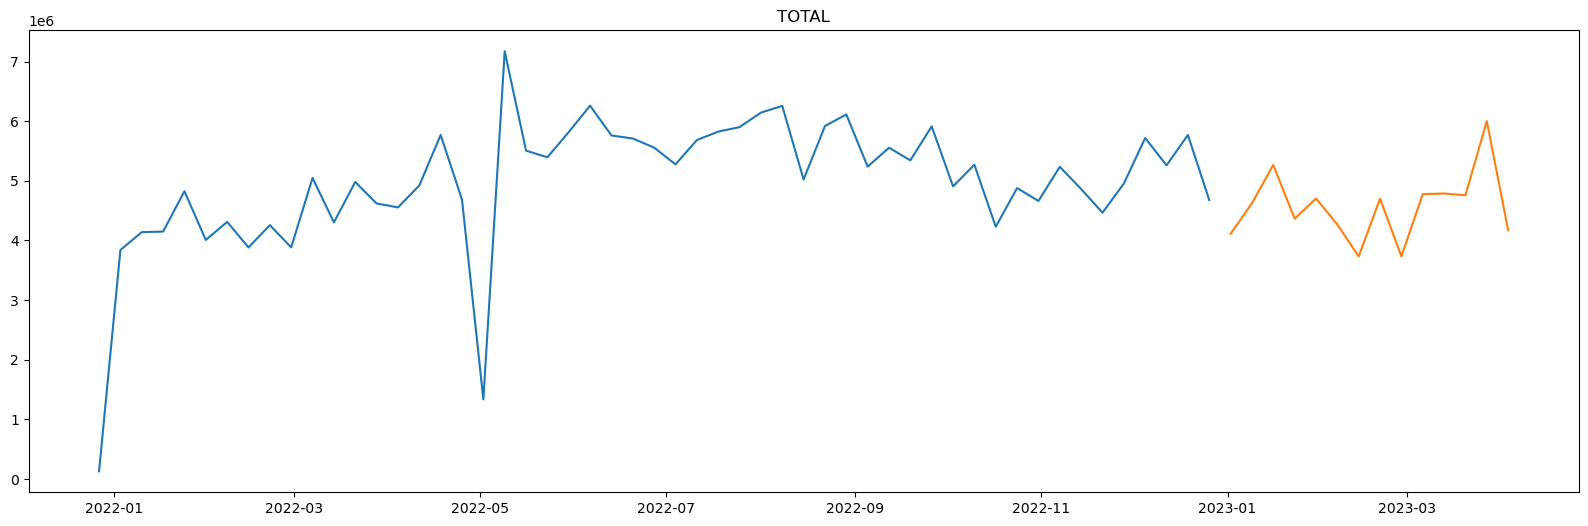

In [59]:
plt.figure(figsize=(20, 6))
plt.plot(total_train)
plt.plot(total_test)
plt.title("TOTAL")

From the above plot, it can be seen that the data is fairly stationary. However, there are two points where the quantity per week drops dramatically, which are the first week of recorded data on December 27th, 2021, and May 2nd, 2022.

### 5.8.2 - Grouped by cluster

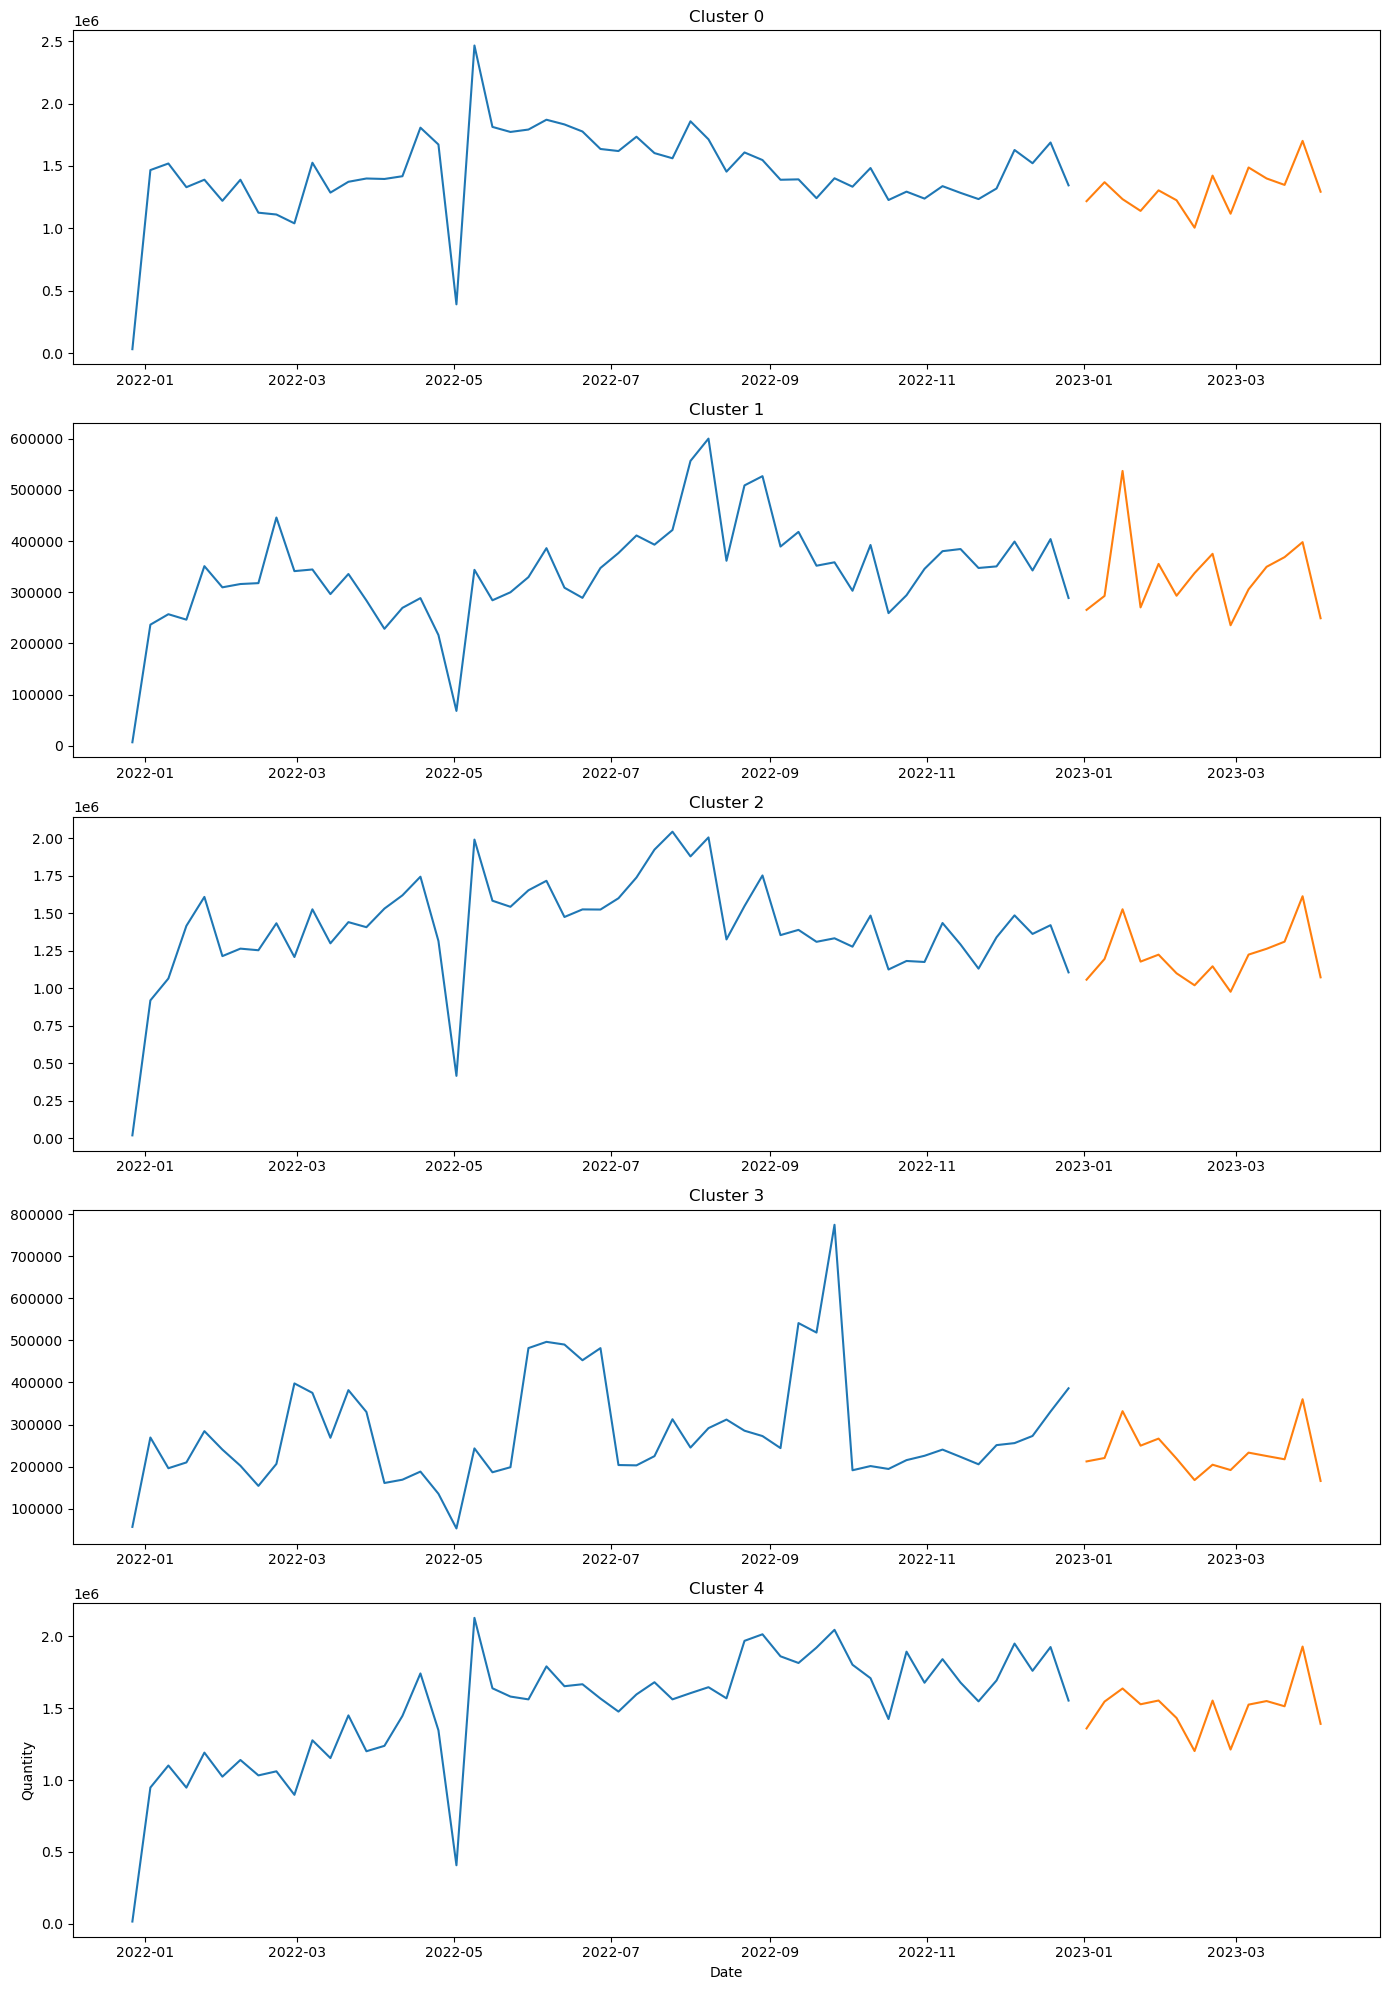

In [60]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(14, 20))

# plot the time series of each cluster in separate subplots
axs[0].plot(cls_0_train)
axs[0].plot(cls_0_test)
axs[0].set_title('Cluster 0')
axs[1].plot(cls_1_train)
axs[1].plot(cls_1_test)
axs[1].set_title('Cluster 1')
axs[2].plot(cls_2_train)
axs[2].plot(cls_2_test)
axs[2].set_title('Cluster 2')
axs[3].plot(cls_3_train)
axs[3].plot(cls_3_test)
axs[3].set_title('Cluster 3')
axs[4].plot(cls_4_train)
axs[4].plot(cls_4_test)
axs[4].set_title('Cluster 4')

# add x and y axis labels for the last subplot
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Quantity')

# adjust the layout to prevent overlapping titles
plt.tight_layout()

# show the plot
plt.show()

After being separated into 5 clusters, the trend line of each cluster is different, indicating that the data is not homogeneous and can be further analyzed to identify patterns or characteristics unique to each cluster.

# 6 - Modeling

## 6.1 - Sarimax

One of the key advantages of using the SARIMAX algorithm for time series analysis is its flexibility and ease of use. With its ability to handle both seasonal and non-seasonal components of the data and a wide range of time series data, SARIMAX is a highly adaptable tool that can be customized to suit specific modeling needs. Additionally, SARIMAX has a variety of tuning parameters that can be adjusted to optimize the model, making it an easy and straightforward choice for analyzing weekly quantity time series data.

### 6.1.1 - Total

Modeling using the SARIMAX algorithm with data that does not involve clustered products.

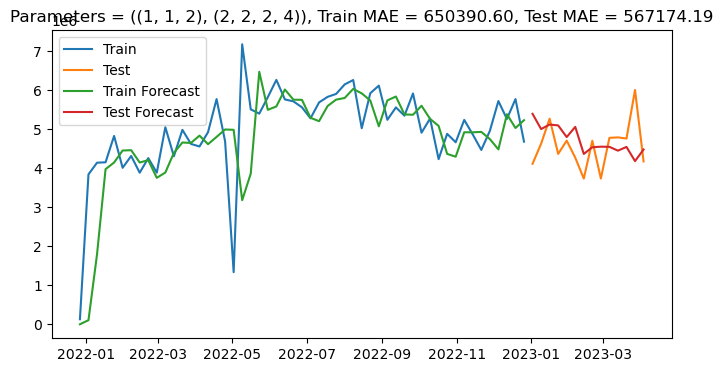

In [61]:
model_sr_total = SARIMAX(total_train, order=(1, 1, 0), seasonal_order=(0, 1, 1, 8), enforce_stationarity=False, enforce_invertibility=False)
fit_total_sr = model_sr_total.fit()

# make predictions for the entire dataset
pred_train_total_sr = fit_total_sr.predict(start=total_train.index[0], end=total_test.index[-1])

# extract the predictions for the training set
pred_train_total_sr = pred_train_total_sr[:len(total_train)]
pred_test_total_sr = fit_total_sr.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(total_train, pred_train_total_sr)
mae_testing = mean_absolute_error(total_test, pred_test_total_sr)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total_sr, label='Train Forecast')
ax.plot(total_test.index, pred_test_total_sr.values, label='Test Forecast')
ax.set_title(f'Parameters = {(1, 1, 2), (2, 2, 2, 4)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

Based on the given information, Model resulted in a training mean absolute error (MAE) of 650390 and a test MAE of 567174. This suggests that the model may have overfitted to the training data, as evidenced by the higher training error compared to the test error.

### 6.1.2 - Cluster

Modeling using the SARIMAX algorithm with data that is clustered by product trend.

Cluster 0

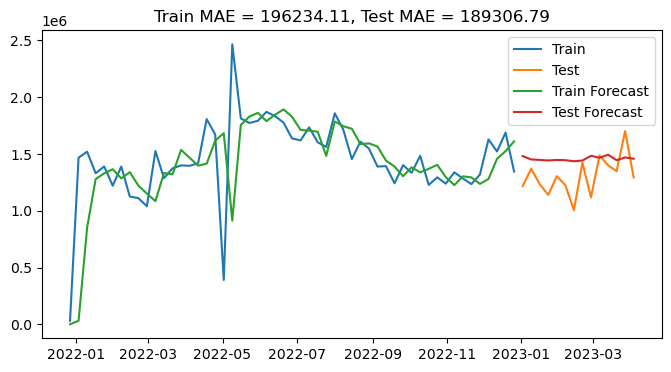

In [62]:
model_0 = SARIMAX(cls_0_train, order=(0, 1, 2), seasonal_order=(0, 0, 2, 12), enforce_stationarity=False, enforce_invertibility=False)
fit_0 = model_0.fit()

# make predictions for the entire dataset
pred_train_0 = fit_0.predict(start=cls_0_train.index[0], end=cls_0_test.index[-1])

# extract the predictions for the training set
pred_train_0 = pred_train_0[:len(cls_0_train)]
pred_test_0 = fit_0.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_0_train, pred_train_0)
mae_testing = mean_absolute_error(cls_0_test, pred_test_0)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_0_train.index, cls_0_train.values, label='Train')
ax.plot(cls_0_test.index, cls_0_test.values, label='Test')
ax.plot(cls_0_train.index, pred_train_0, label='Train Forecast')
ax.plot(cls_0_test.index, pred_test_0.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

Cluster 1

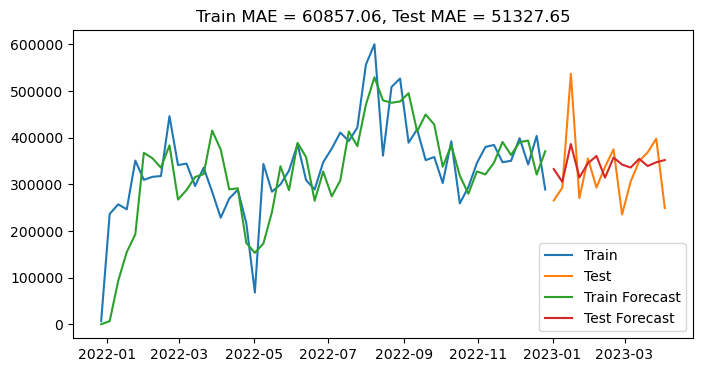

In [63]:
model_1 = SARIMAX(cls_1_train, order=(0, 1, 1), seasonal_order=(1, 1, 2, 4), enforce_stationarity=False, enforce_invertibility=False)
fit_1 = model_1.fit()

# make predictions for the entire dataset
pred_train_1 = fit_1.predict(start=cls_1_train.index[0], end=cls_1_test.index[-1])

# extract the predictions for the training set
pred_train_1 = pred_train_1[:len(cls_0_train)]
pred_test_1 = fit_1.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_1_train, pred_train_1)
mae_testing = mean_absolute_error(cls_1_test, pred_test_1)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_1_train.index, cls_1_train.values, label='Train')
ax.plot(cls_1_test.index, cls_1_test.values, label='Test')
ax.plot(cls_1_train.index, pred_train_1, label='Train Forecast')
ax.plot(cls_1_test.index, pred_test_1.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

Cluster 2

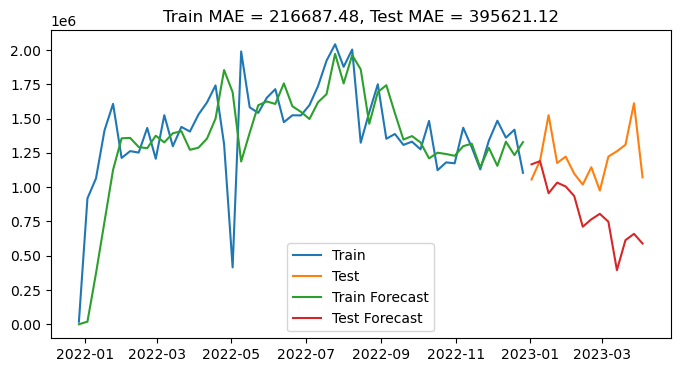

In [64]:
model_2 = SARIMAX(cls_2_train, order=(1, 1, 2), seasonal_order=(3, 2, 2, 4), enforce_stationarity=False, enforce_invertibility=False)
fit_2 = model_2.fit()

# make predictions for the entire dataset
pred_train_2 = fit_2.predict(start=cls_2_train.index[0], end=cls_2_test.index[-1])

# extract the predictions for the training set
pred_train_2 = pred_train_2[:len(cls_0_train)]
pred_test_2 = fit_2.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_2_train, pred_train_2)
mae_testing = mean_absolute_error(cls_2_test, pred_test_2)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_2_train.index, cls_2_train.values, label='Train')
ax.plot(cls_2_test.index, cls_2_test.values, label='Test')
ax.plot(cls_2_train.index, pred_train_2, label='Train Forecast')
ax.plot(cls_2_test.index, pred_test_2.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

Cluster 3

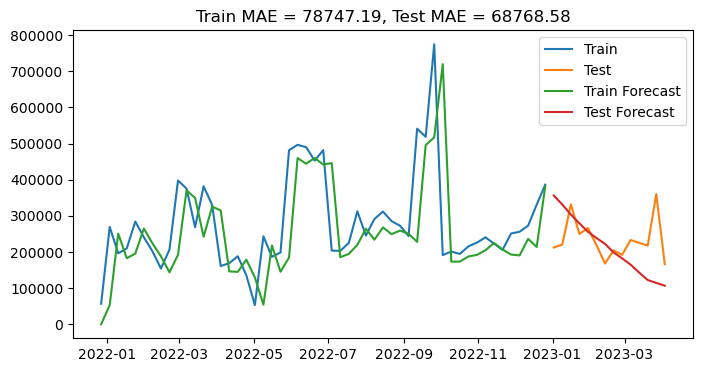

In [65]:
model_3 = SARIMAX(cls_3_train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
fit_3 = model_3.fit()

# make predictions for the entire dataset
pred_train_3 = fit_3.predict(start=cls_3_train.index[0], end=cls_3_test.index[-1])

# extract the predictions for the training set
pred_train_3 = pred_train_3[:len(cls_0_train)]
pred_test_3 = fit_3.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_3_train, pred_train_3)
mae_testing = mean_absolute_error(cls_3_test, pred_test_3)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_3_train.index, cls_3_train.values, label='Train')
ax.plot(cls_3_test.index, cls_3_test.values, label='Test')
ax.plot(cls_3_train.index, pred_train_3, label='Train Forecast')
ax.plot(cls_3_test.index, pred_test_3.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

Cluster 4

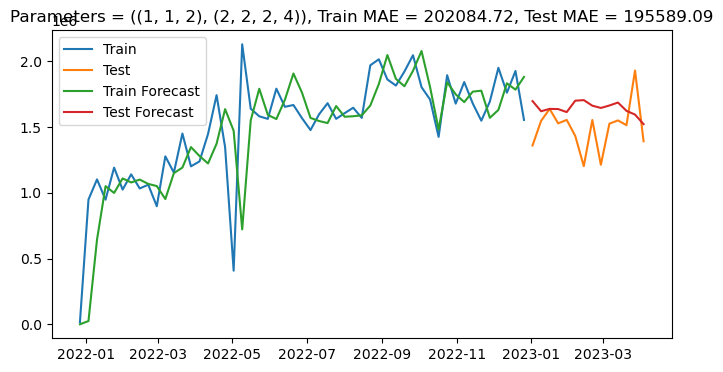

In [66]:
model_4 = SARIMAX(cls_4_train, order=(1, 2, 1), seasonal_order=(1, 0, 0, 24), enforce_stationarity=False, enforce_invertibility=False)
fit_4 = model_4.fit()

# make predictions for the entire dataset
pred_train_4 = fit_4.predict(start=cls_4_train.index[0], end=cls_4_test.index[-1])

# extract the predictions for the training set
pred_train_4 = pred_train_4[:len(cls_0_train)]
pred_test_4 = fit_4.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_4_train, pred_train_4)
mae_testing = mean_absolute_error(cls_4_test, pred_test_4)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_4_train.index, cls_4_train.values, label='Train')
ax.plot(cls_4_test.index, cls_4_test.values, label='Test')
ax.plot(cls_4_train.index, pred_train_4, label='Train Forecast')
ax.plot(cls_4_test.index, pred_test_4.values, label='Test Forecast')
ax.set_title(f'Parameters = {(1, 1, 2), (2, 2, 2, 4)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

#### Combined Cluster Sarimax

In [67]:
pred_test_total = pred_test_0 + pred_test_1 + pred_test_2 + pred_test_3 + pred_test_4
pred_train_total = pred_train_0 + pred_train_1 + pred_train_2 + pred_train_3 + pred_train_4
mean_absolute_error(total_train, pred_train_total)
mean_absolute_error(total_test, pred_test_total)

561886.4945300646

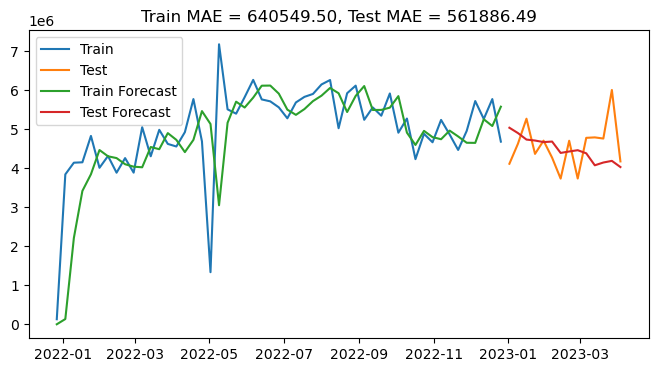

In [68]:
# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total, label='Train Forecast')
ax.plot(total_test.index, pred_test_total.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mean_absolute_error(total_train, pred_train_total):.2f}, Test MAE = {mean_absolute_error(total_test, pred_test_total):.2f}')
ax.legend()
plt.show()

The results show that clustering the products into 5 groups and creating individual SARIMAX models for each group has a lower MAE on both the train and test sets compared to using a single SARIMAX model without clustering. This suggests that by taking into account the unique characteristics of each product group, the models are able to better capture the trend and seasonality patterns in the data and make more accurate forecasts. Additionally, the lower MAE on the test set indicates that the clustered models are more likely to generalize well to new, unseen data.

## 6.2 - Holt-Winter

Holt-Winters algorithm is a popular choice for time series analysis, particularly for weekly quantity data. One of the main reasons for this is its ability to handle seasonal and trend components of the data, which are often present in weekly quantity data. By incorporating both the trend and seasonal components of the data, Holt-Winters can provide more accurate forecasts compared to other algorithms that only consider one or the other. Additionally, Holt-Winters can capture multiple seasonality patterns, making it a powerful tool for analyzing weekly quantity time series data. The algorithm is also relatively simple and easy to implement, making it a popular choice for both novice and expert time series analysts. Overall, Holt-Winters algorithm is a strong choice for analyzing weekly quantity time series data due to its ability to handle seasonal and trend components, multiple seasonality patterns, and simplicity in implementation.

### 6.2.1 - Total

Modeling using the ExponentialSmoothing algorithm with data that does not involve clustered products.

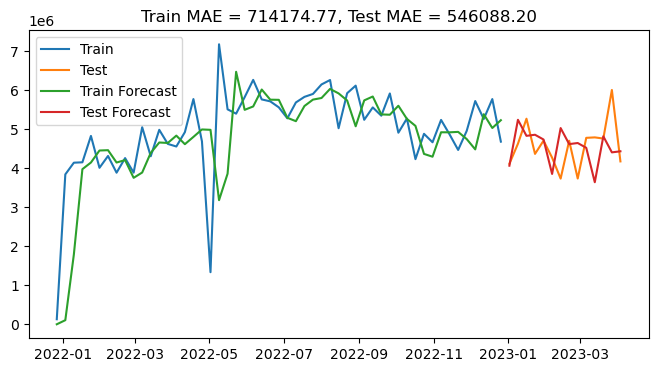

In [69]:
model_hw_total = ExponentialSmoothing(total_train, trend='add', seasonal='add', seasonal_periods=5)
fit_total_hw = model_hw_total.fit()

# make predictions for the entire dataset
pred_train_total_hw_sg = fit_total_hw.predict(start=total_train.index[0], end=total_test.index[-1])

# extract the predictions for the training set
pred_train_total_hw_sg = pred_train_total_hw_sg[:len(total_train)]
pred_test_total_hw_sg = fit_total_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(total_train, pred_train_total_hw_sg)
mae_testing = mean_absolute_error(total_test, pred_test_total_hw_sg)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total_sr, label='Train Forecast')
ax.plot(total_test.index, pred_test_total_hw_sg.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

The single model that uses Holt-Winter algorithm achieves a Train MAE of 714174 and Test MAE of 546088. This indicates that the Holt-Winter algorithm is not a strong choice for analyzing the weekly quantity time series data.

### 6.2.2 - Cluster

Modeling using the ExponentialSmoothing algorithm with data that is clustered by product trend.

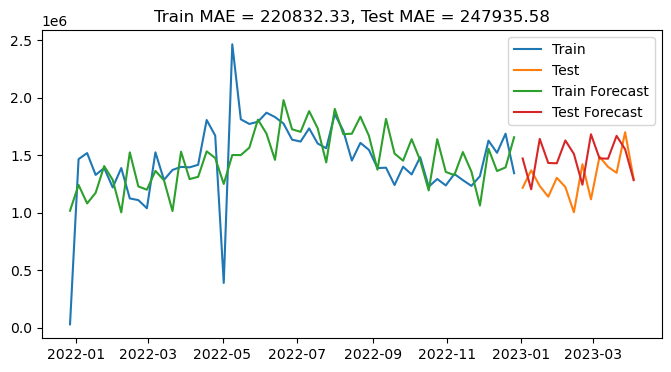

In [70]:
model_0_hw = ExponentialSmoothing(cls_0_train, trend='add', seasonal='add', seasonal_periods=6)
fit_0_hw = model_0_hw.fit()

# make predictions for the entire dataset
pred_train_0_hw = fit_0_hw.predict(start=cls_0_train.index[0], end=cls_0_test.index[-1])

# extract the predictions for the training set
pred_train_0_hw = pred_train_0_hw[:len(cls_0_train)]
pred_test_0_hw = fit_0_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_0_train, pred_train_0_hw)
mae_testing = mean_absolute_error(cls_0_test, pred_test_0_hw)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_0_train.index, cls_0_train.values, label='Train')
ax.plot(cls_0_test.index, cls_0_test.values, label='Test')
ax.plot(cls_0_train.index, pred_train_0_hw, label='Train Forecast')
ax.plot(cls_0_test.index, pred_test_0_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

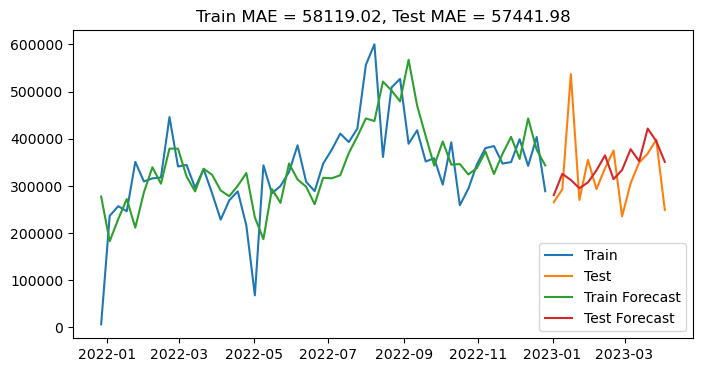

In [71]:
model_1_hw = ExponentialSmoothing(cls_1_train, trend='add', seasonal='add', seasonal_periods=14)
fit_1_hw = model_1_hw.fit()

# make predictions for the entire dataset
pred_train_1_hw = fit_1_hw.predict(start=cls_1_train.index[0], end=cls_1_test.index[-1])

# extract the predictions for the training set
pred_train_1_hw = pred_train_1_hw[:len(cls_1_train)]
pred_test_1_hw = fit_1_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_1_train, pred_train_1_hw)
mae_testing = mean_absolute_error(cls_1_test, pred_test_1_hw)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_1_train.index, cls_1_train.values, label='Train')
ax.plot(cls_1_test.index, cls_1_test.values, label='Test')
ax.plot(cls_1_train.index, pred_train_1_hw, label='Train Forecast')
ax.plot(cls_1_test.index, pred_test_1_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

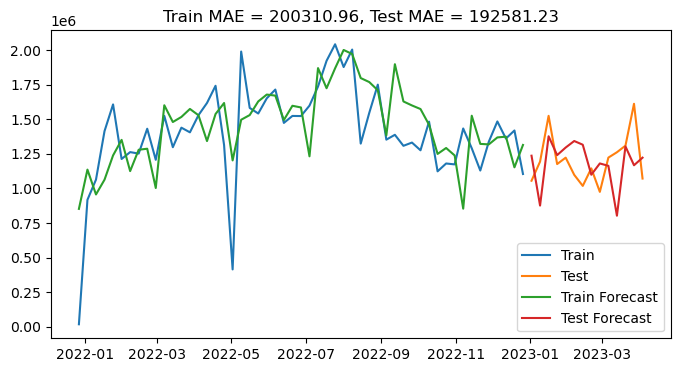

In [72]:
model_2_hw = ExponentialSmoothing(cls_2_train, trend='add', seasonal='add', seasonal_periods=9)
fit_2_hw = model_2_hw.fit()

# make predictions for the entire dataset
pred_train_2_hw = fit_2_hw.predict(start=cls_2_train.index[0], end=cls_2_test.index[-1])

# extract the predictions for the training set
pred_train_2_hw = pred_train_2_hw[:len(cls_2_train)]
pred_test_2_hw = fit_2_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_2_train, pred_train_2_hw)
mae_testing = mean_absolute_error(cls_2_test, pred_test_2_hw)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_2_train.index, cls_2_train.values, label='Train')
ax.plot(cls_2_test.index, cls_2_test.values, label='Test')
ax.plot(cls_2_train.index, pred_train_2_hw, label='Train Forecast')
ax.plot(cls_2_test.index, pred_test_2_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

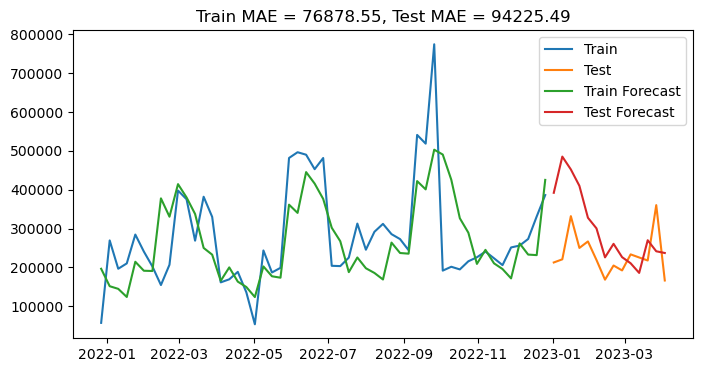

In [73]:
model_3_hw = ExponentialSmoothing(cls_3_train, trend='add', seasonal='add', seasonal_periods=15)
fit_3_hw = model_3_hw.fit()

# make predictions for the entire dataset
pred_train_3_hw = fit_3_hw.predict(start=cls_3_train.index[0], end=cls_3_test.index[-1])

# extract the predictions for the training set
pred_train_3_hw = pred_train_3_hw[:len(cls_3_train)]
pred_test_3_hw = fit_3_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_3_train, pred_train_3_hw)
mae_testing = mean_absolute_error(cls_3_test, pred_test_3_hw)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_3_train.index, cls_3_train.values, label='Train')
ax.plot(cls_3_test.index, cls_3_test.values, label='Test')
ax.plot(cls_3_train.index, pred_train_3_hw, label='Train Forecast')
ax.plot(cls_3_test.index, pred_test_3_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

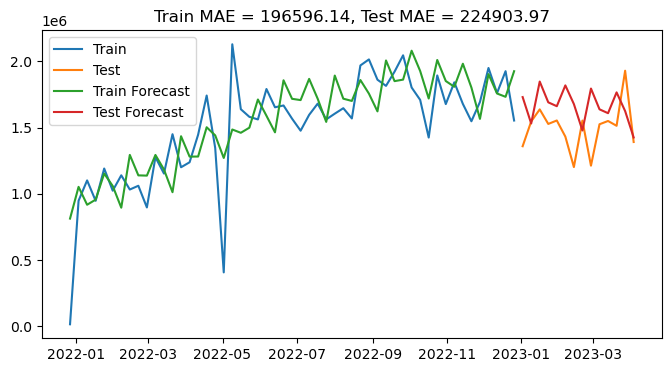

In [74]:
model_4_hw = ExponentialSmoothing(cls_4_train, trend='add', seasonal='add', seasonal_periods=6)
fit_4_hw = model_4_hw.fit()

# make predictions for the entire dataset
pred_train_4_hw = fit_4_hw.predict(start=cls_4_train.index[0], end=cls_4_test.index[-1])

# extract the predictions for the training set
pred_train_4_hw = pred_train_4_hw[:len(cls_4_train)]
pred_test_4_hw = fit_4_hw.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_4_train, pred_train_4_hw)
mae_testing = mean_absolute_error(cls_4_test, pred_test_4_hw)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_4_train.index, cls_4_train.values, label='Train')
ax.plot(cls_4_test.index, cls_4_test.values, label='Test')
ax.plot(cls_4_train.index, pred_train_4_hw, label='Train Forecast')
ax.plot(cls_4_test.index, pred_test_4_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

#### Combined Cluster Holt-Winter

In [75]:
pred_test_total_hw = pred_test_0_hw + pred_test_1_hw + pred_test_2_hw + pred_test_3_hw + pred_test_4_hw
pred_train_total_hw = pred_train_0_hw + pred_train_1_hw + pred_train_2_hw + pred_train_3_hw + pred_train_4_hw
mean_absolute_error(total_train, pred_train_total_hw)
mean_absolute_error(total_test, pred_test_total_hw)

671807.0969643511

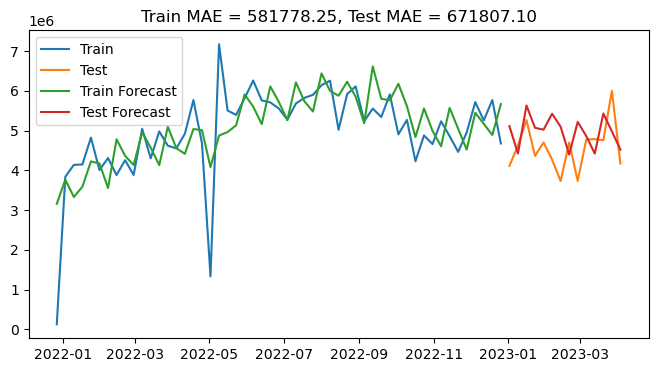

In [76]:
# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total_hw.values, label='Train Forecast')
ax.plot(total_test.index, pred_test_total_hw.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mean_absolute_error(total_train, pred_train_total_hw):.2f}, Test MAE = {mean_absolute_error(total_test, pred_test_total_hw):.2f}')
ax.legend()
plt.show()

Based on the comparison, the model with clustering using Holt-Winter algorithm has lower MAE value for the test set compared to the model without clustering. However, the MAE value for the training set is higher for the model without clustering.

## 6.3 - Arima

ARIMA is an established algorithm that is widely used for time series analysis and forecasting, and it is a good choice for analyzing weekly quantity time series data due to its ability to capture trend and seasonality, flexibility in customization, and strong theoretical foundation. With the ability to accurately model both the trend and seasonality components of the data, and a variety of parameters that can be tuned to optimize the model, ARIMA allows experts to tailor the model to the specific characteristics of the data, providing accurate forecasts. Furthermore, ARIMA's well-established theoretical foundation provides a high level of confidence in the accuracy and reliability of the model.

### 6.3.1 - Total

Modeling using the ARIMA algorithm with data that does not involve clustered products.

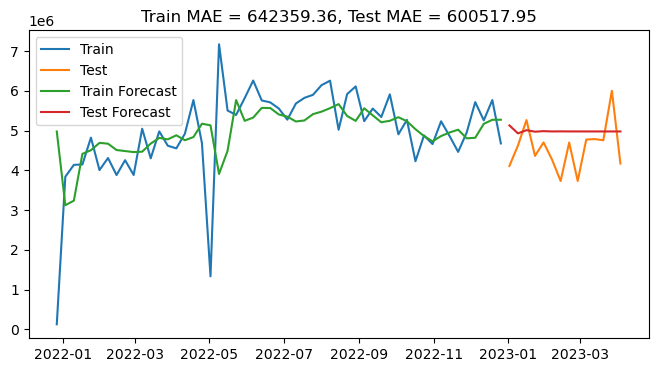

In [77]:
model_ar_total = ARIMA(total_train, order=(2, 0, 0))
fit_total_ar = model_ar_total.fit()

# make predictions for the entire dataset
pred_train_total_ar_sg = fit_total_ar.predict(start=total_train.index[0], end=total_test.index[-1])

# extract the predictions for the training set
pred_train_total_ar_sg = pred_train_total_ar_sg[:len(total_train)]
pred_test_total_ar_sg = fit_total_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(total_train, pred_train_total_ar_sg)
mae_testing = mean_absolute_error(total_test, pred_test_total_ar_sg)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total_ar_sg, label='Train Forecast')
ax.plot(total_test.index, pred_test_total_ar_sg.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

The ARIMA algorithm has proven to be a useful model for time series analysis and forecasting. With a Train MAE of 642359 and Test MAE of 600517, it has shown to perform relatively well in predicting the weekly quantity of products.

### 6.3.2 - Cluster

Modeling using the ARIMA algorithm with data that is clustered by product trend.

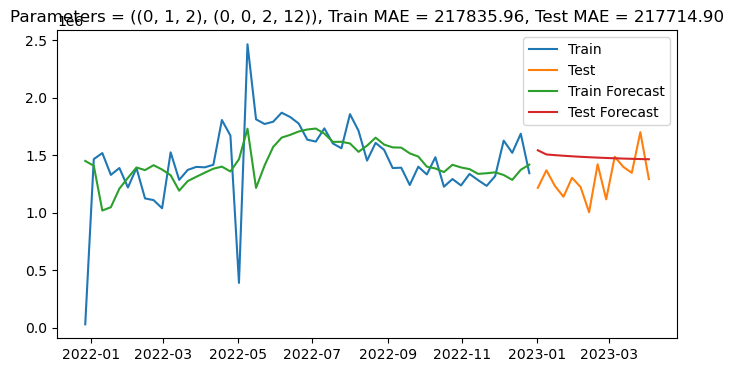

In [78]:
model_0_ar = ARIMA(cls_0_train, order=(1, 0, 2))
fit_0_ar = model_0_ar.fit()

# make predictions for the entire dataset
pred_train_0_ar = fit_0_ar.predict(start=cls_0_train.index[0], end=cls_0_test.index[-1])

# extract the predictions for the training set
pred_train_0_ar = pred_train_0_ar[:len(cls_0_train)]
pred_test_0_ar = fit_0_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_0_train, pred_train_0_ar)
mae_testing = mean_absolute_error(cls_0_test, pred_test_0_ar)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_0_train.index, cls_0_train.values, label='Train')
ax.plot(cls_0_test.index, cls_0_test.values, label='Test')
ax.plot(cls_0_train.index, pred_train_0_ar, label='Train Forecast')
ax.plot(cls_0_test.index, pred_test_0_ar.values, label='Test Forecast')
ax.set_title(f'Parameters = {(0, 1, 2), (0, 0, 2, 12)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

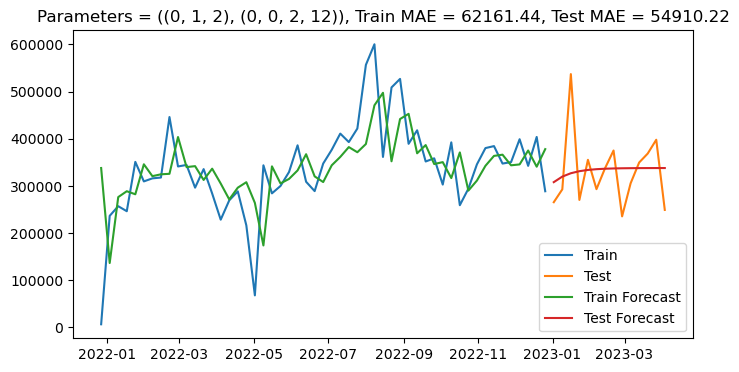

In [79]:
model_1_ar = ARIMA(cls_1_train, order=(1, 0, 0))
fit_1_ar = model_1_ar.fit()

# make predictions for the entire dataset
pred_train_1_ar = fit_1_ar.predict(start=cls_1_train.index[0], end=cls_1_test.index[-1])

# extract the predictions for the training set
pred_train_1_ar = pred_train_1_ar[:len(cls_1_train)]
pred_test_1_ar = fit_1_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_1_train, pred_train_1_ar)
mae_testing = mean_absolute_error(cls_1_test, pred_test_1_ar)


# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_1_train.index, cls_1_train.values, label='Train')
ax.plot(cls_1_test.index, cls_1_test.values, label='Test')
ax.plot(cls_1_train.index, pred_train_1_ar, label='Train Forecast')
ax.plot(cls_1_test.index, pred_test_1_ar.values, label='Test Forecast')
ax.set_title(f'Parameters = {(0, 1, 2), (0, 0, 2, 12)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

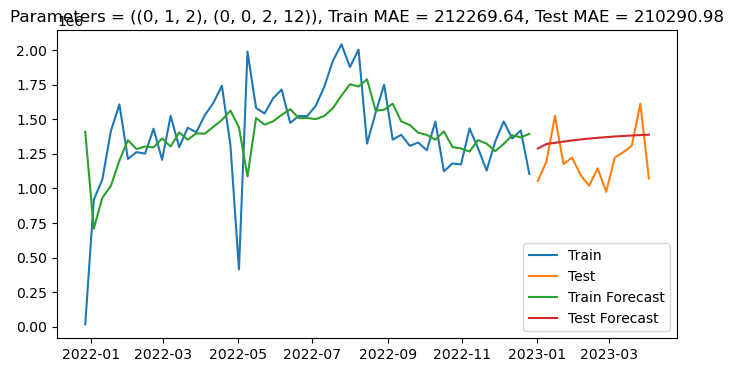

In [80]:
model_2_ar = ARIMA(cls_2_train, order=(1, 0, 3))
fit_2_ar = model_2_ar.fit()

# make predictions for the entire dataset
pred_train_2_ar = fit_2_ar.predict(start=cls_2_train.index[0], end=cls_2_test.index[-1])

# extract the predictions for the training set
pred_train_2_ar = pred_train_2_ar[:len(cls_2_train)]
pred_test_2_ar = fit_2_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_2_train, pred_train_2_ar)
mae_testing = mean_absolute_error(cls_2_test, pred_test_2_ar)

# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_2_train.index, cls_2_train.values, label='Train')
ax.plot(cls_2_test.index, cls_2_test.values, label='Test')
ax.plot(cls_2_train.index, pred_train_2_ar, label='Train Forecast')
ax.plot(cls_2_test.index, pred_test_2_ar.values, label='Test Forecast')
ax.set_title(f'Parameters = {(0, 1, 2), (0, 0, 2, 12)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

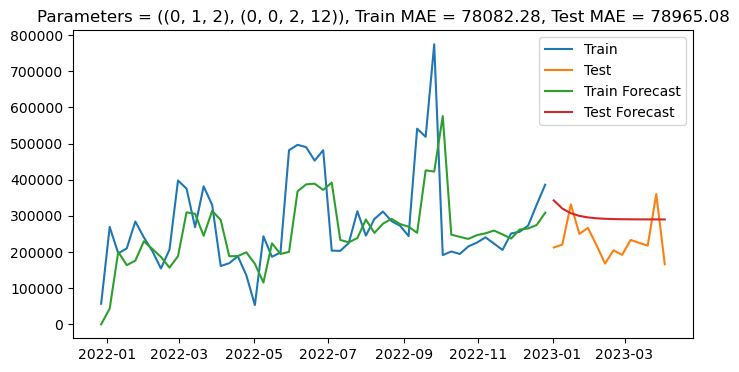

In [81]:
model_3_ar = ARIMA(cls_3_train, order=(2, 1, 1))
fit_3_ar = model_3_ar.fit()

# make predictions for the entire dataset
pred_train_3_ar = fit_3_ar.predict(start=cls_3_train.index[0], end=cls_3_test.index[-1])

# extract the predictions for the training set
pred_train_3_ar = pred_train_3_ar[:len(cls_3_train)]
pred_test_3_ar = fit_3_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_3_train, pred_train_3_ar)
mae_testing = mean_absolute_error(cls_3_test, pred_test_3_ar)

# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_3_train.index, cls_3_train.values, label='Train')
ax.plot(cls_3_test.index, cls_3_test.values, label='Test')
ax.plot(cls_3_train.index, pred_train_3_ar, label='Train Forecast')
ax.plot(cls_3_test.index, pred_test_3_ar.values, label='Test Forecast')
ax.set_title(f'Parameters = {(0, 1, 2), (0, 0, 2, 12)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

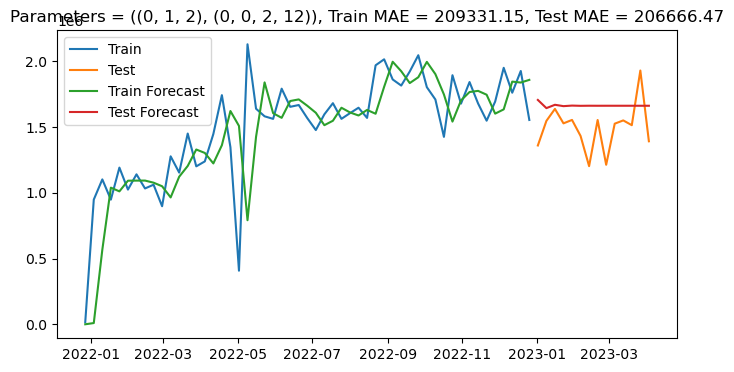

In [82]:
model_4_ar = ARIMA(cls_4_train, order=(1, 1, 0))
fit_4_ar = model_4_ar.fit()

# make predictions for the entire dataset
pred_train_4_ar = fit_4_ar.predict(start=cls_4_train.index[0], end=cls_4_test.index[-1])

# extract the predictions for the training set
pred_train_4_ar = pred_train_4_ar[:len(cls_4_train)]
pred_test_4_ar = fit_4_ar.forecast(14)

# calculate MAE for the training set
mae_train = mean_absolute_error(cls_4_train, pred_train_4_ar)
mae_testing = mean_absolute_error(cls_4_test, pred_test_4_ar)

# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cls_4_train.index, cls_4_train.values, label='Train')
ax.plot(cls_4_test.index, cls_4_test.values, label='Test')
ax.plot(cls_4_train.index, pred_train_4_ar, label='Train Forecast')
ax.plot(cls_4_test.index, pred_test_4_ar.values, label='Test Forecast')
ax.set_title(f'Parameters = {(0, 1, 2), (0, 0, 2, 12)}, Train MAE = {mae_train:.2f}, Test MAE = {mae_testing:.2f}')
ax.legend()
plt.show()

#### Combined Cluster Arima

In [83]:
pred_test_total_ar = pred_test_0_ar + pred_test_1_ar + pred_test_2_ar + pred_test_3_ar + pred_test_4_ar
pred_train_total_ar = pred_train_0_ar + pred_train_1_ar + pred_train_2_ar + pred_train_3_ar + pred_train_4_ar
mean_absolute_error(total_train, pred_train_total_ar)
mean_absolute_error(total_test, pred_test_total_ar)

709101.2398026334

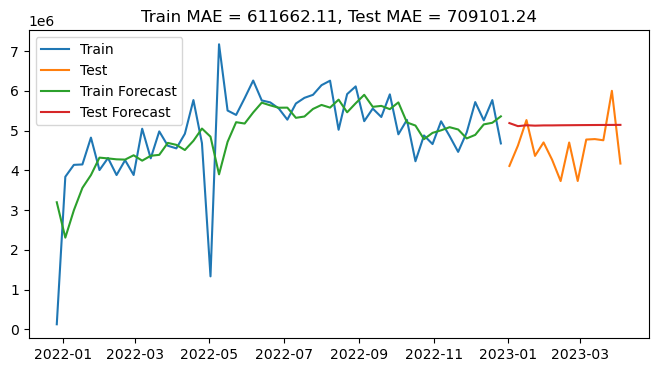

In [84]:
# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, pred_train_total_ar, label='Train Forecast')
ax.plot(total_test.index, pred_test_total_ar.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mean_absolute_error(total_train, pred_train_total_ar):.2f}, Test MAE = {mean_absolute_error(total_test, pred_test_total_ar):.2f}')
ax.legend()
plt.show()

By comparing the results of the ARIMA model with and without clustering, we can see that the clustering approach has resulted in a higher Test MAE, indicating that the model is less accurate in predicting the test data. This suggests that the ARIMA model without clustering may be more effective in forecasting the weekly quantity of products.

## 6.4 - Combined Best Cluster

Group result of Train MAE and Test MAE for each cluster and each cluster. To find which model is the best to combine.

In [85]:
data_cls_0 = {'model': ['Sarimax', 'Arima', 'Holt-Winter'], 
        'train_mae': [mean_absolute_error(cls_0_train, pred_train_0), 
                      mean_absolute_error(cls_0_train, pred_train_0_ar), 
                      mean_absolute_error(cls_0_train, pred_train_0_hw)], 
        'test_mae': [mean_absolute_error(cls_0_test, pred_test_0), 
                     mean_absolute_error(cls_0_test, pred_test_0_ar), 
                     mean_absolute_error(cls_0_test, pred_test_0_hw)]}

cls_0_comparison = pd.DataFrame(data_cls_0)

data_cls_1 = {'model': ['Sarimax', 'Arima', 'Holt-Winter'], 
        'train_mae': [mean_absolute_error(cls_1_train, pred_train_1), 
                      mean_absolute_error(cls_1_train, pred_train_1_ar), 
                      mean_absolute_error(cls_1_train, pred_train_1_hw)], 
        'test_mae': [mean_absolute_error(cls_1_test, pred_test_1), 
                     mean_absolute_error(cls_1_test, pred_test_1_ar), 
                     mean_absolute_error(cls_1_test, pred_test_1_hw)]}

cls_1_comparison = pd.DataFrame(data_cls_1)

data_cls_2 = {'model': ['Sarimax', 'Arima', 'Holt-Winter'], 
        'train_mae': [mean_absolute_error(cls_2_train, pred_train_2), 
                      mean_absolute_error(cls_2_train, pred_train_2_ar), 
                      mean_absolute_error(cls_2_train, pred_train_2_hw)], 
        'test_mae': [mean_absolute_error(cls_2_test, pred_test_2), 
                     mean_absolute_error(cls_2_test, pred_test_2_ar), 
                     mean_absolute_error(cls_2_test, pred_test_2_hw)]}

cls_2_comparison = pd.DataFrame(data_cls_2)

data_cls_3 = {'model': ['Sarimax', 'Arima', 'Holt-Winter'], 
        'train_mae': [mean_absolute_error(cls_3_train, pred_train_3), 
                      mean_absolute_error(cls_3_train, pred_train_3_ar), 
                      mean_absolute_error(cls_3_train, pred_train_3_hw)], 
        'test_mae': [mean_absolute_error(cls_3_test, pred_test_3), 
                     mean_absolute_error(cls_3_test, pred_test_3_ar), 
                     mean_absolute_error(cls_3_test, pred_test_3_hw)]}

cls_3_comparison = pd.DataFrame(data_cls_3)

data_cls_4 = {'model': ['Sarimax', 'Arima', 'Holt-Winter'], 
        'train_mae': [mean_absolute_error(cls_4_train, pred_train_4), 
                      mean_absolute_error(cls_4_train, pred_train_4_ar), 
                      mean_absolute_error(cls_4_train, pred_train_4_hw)], 
        'test_mae': [mean_absolute_error(cls_4_test, pred_test_4), 
                     mean_absolute_error(cls_4_test, pred_test_4_ar), 
                     mean_absolute_error(cls_4_test, pred_test_4_hw)]}

cls_4_comparison = pd.DataFrame(data_cls_4)

Compare which model that going to be combined.

In [86]:
cls_0_comparison

,model,train_mae,test_mae
0,Sarimax,196234.107026,189306.792362
1,Arima,217835.955540,217714.898362
2,Holt-Winter,220832.332574,247935.576284


Because the SARIMAX model has the best train MAE and test MAE, the SARIMAX algorithm will be used for the model in cluster 0.

In [87]:
cls_1_comparison

,model,train_mae,test_mae
0,Sarimax,60857.056543,51327.653528
1,Arima,62161.440210,54910.215047
2,Holt-Winter,58119.022695,57441.979109


Because the Sarimax model has the best test MAE and the Train MAE doesn't differ much from the Holt-Winter model, the Sarimax algorithm will be used for cluster 1.

In [88]:
cls_2_comparison

,model,train_mae,test_mae
0,Sarimax,216687.479526,395621.119532
1,Arima,212269.639040,210290.976376
2,Holt-Winter,200310.960367,192581.228510


Because the Holt-Winter model has the best train MAE and test MAE, the Holt-Winter algorithm will be used for the model in cluster 2.

In [89]:
cls_3_comparison

,model,train_mae,test_mae
0,Sarimax,78747.190602,68768.581207
1,Arima,78082.284402,78965.079794
2,Holt-Winter,76878.553320,94225.485890


Because the Sarimax model has the best test MAE and the Train MAE doesn't differ much from the Arima model, the Sarimax algorithm will be used for cluster 3.

In [90]:
cls_4_comparison

,model,train_mae,test_mae
0,Sarimax,202084.719264,195589.087566
1,Arima,209331.147163,206666.467979
2,Holt-Winter,196596.137656,224903.965102


Because the Sarimax model has the best test MAE and the Train MAE doesn't differ much from the Holt-Winter model, the Sarimax algorithm will be used for cluster 4.

After we got the best model for each cluster, combined the result of forecasting and calculate the MAE for training set and test set.

In [91]:
best_pred_test_total = pred_test_0 + pred_test_1 + pred_test_2_hw + pred_test_3 + pred_test_4
best_pred_train_total = pred_train_0 + pred_train_1 + pred_train_2_hw + pred_train_3 + pred_train_4

In [92]:
mean_absolute_error(total_train, best_pred_train_total)

586558.4988048449

In [93]:
mean_absolute_error(total_test, best_pred_test_total)

527882.7143127804

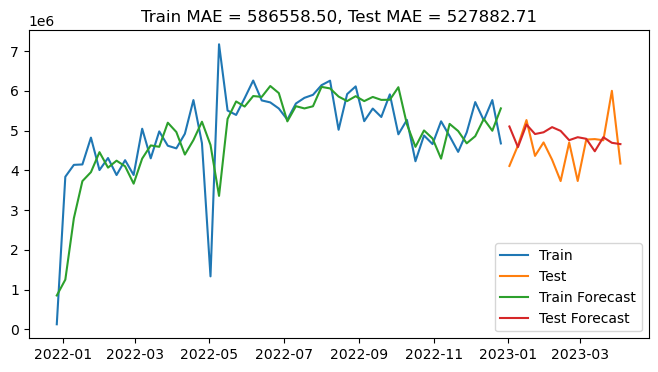

In [94]:
# plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(total_train.index, total_train.values, label='Train')
ax.plot(total_test.index, total_test.values, label='Test')
ax.plot(total_train.index, best_pred_train_total, label='Train Forecast')
ax.plot(total_test.index, best_pred_test_total.values, label='Test Forecast')
ax.set_title(f'Train MAE = {mean_absolute_error(total_train, best_pred_train_total):.2f}, Test MAE = {mean_absolute_error(total_test, best_pred_test_total):.2f}')
ax.legend()
plt.show()

The combination of the best models for each cluster has resulted in a lower Train MAE and Test MAE compared to using individual models for each cluster. This suggests that by combining the strengths of each model, we can achieve better overall performance in forecasting sales quantity. It also implies that clustering the products based on their sales patterns and applying appropriate models to each cluster can improve the accuracy of our sales forecasting. However, it is important to note that this approach requires more computational resources and careful consideration in selecting the appropriate models for each cluster.

## 6.5 - Evaluate Result Modeling

Merge result of each model to compare which model is the best.

In [95]:
data_comparison = {'Model': ['Sarimax', 'Sarimax_cluster', 'HW', 'HW_cluster', 'Arima', 'Arima_cluster', 'Combined_best_model'],
        'Train_MAE': [mean_absolute_error(total_train, pred_train_total_sr),
                      mean_absolute_error(total_train, pred_train_total),
                      mean_absolute_error(total_train, pred_train_total_hw_sg),
                      mean_absolute_error(total_train, pred_train_total_hw),
                      mean_absolute_error(total_train, pred_train_total_ar_sg),
                      mean_absolute_error(total_train, pred_train_total_ar),
                      mean_absolute_error(total_train, best_pred_train_total)],
        'Test_MAE': [mean_absolute_error(total_test, pred_test_total_sr),
                     mean_absolute_error(total_test, pred_test_total),
                     mean_absolute_error(total_test, pred_test_total_hw_sg),
                     mean_absolute_error(total_test, pred_test_total_hw),
                     mean_absolute_error(total_test, pred_test_total_ar_sg),
                     mean_absolute_error(total_test, pred_test_total_ar),
                     mean_absolute_error(total_test, best_pred_test_total)]}

data_comparison_df = pd.DataFrame(data_comparison)

In [96]:
data_comparison_df

,Model,Train_MAE,Test_MAE
0,Sarimax,650390.595037,567174.191774
1,Sarimax_cluster,640549.499093,561886.494530
2,HW,714174.771423,546088.204197
3,HW_cluster,581778.249496,671807.096964
4,Arima,642359.361996,600517.952616
5,Arima_cluster,611662.105915,709101.239803
6,Combined_best_model,586558.498805,527882.714313


The model performance was evaluated using the MAE metric, which measures the level of prediction error, with lower MAE values indicating better model performance. The best model performance was achieved using the combined_best_model, which is a combination of the best models from each cluster. This model had a train-set MAE score of 586,558.498805 and a test-set MAE score of 527,882.714313. This means that if we predict a quantity of 4,500,000 for the next week, there is a high likelihood that the actual quantity for the next week will be between 4,000,000 and 5,000,000, with an error of approximately 500,000 from the predicted value.

The advantage of this best model is that it had the best score compared to the other models. Furthermore, since it is a combination of other models, if there are significant changes in the trend of one of the clusters or products, we only need to replace the model with a changing trend instead of creating an entirely new model. However, the disadvantage of this model is that it is difficult to create and apply because we need to create multiple models before combining them. Additionally, a combined model like this is more costly to create because we need to create more than one model to get good results.

Overall, the model's performance was good, with an MAE score of only 11% of the mean weekly data, indicating that the model could be used to predict the required quantity for the next week. This is good news because businesses can optimize their operations based on the prediction results and manage their inventory more effectively.

# 7 - Model Save

In [97]:
# Save the model to disk
#with open('model_0.pkl', 'wb') as f:
#    pickle.dump(fit_0, f)

#with open('model_1.pkl', 'wb') as a:
#    pickle.dump(fit_1, a)

#with open('model_2.pkl', 'wb') as b:
#   pickle.dump(fit_2_hw, b)

#with open('model_3.pkl', 'wb') as c:
#    pickle.dump(fit_3, c)

#with open('model_4.pkl', 'wb') as d:
#    pickle.dump(fit_4, d)

# 8 - Model Inference

Other Notebook

# 9 - Conclussion

From the exploratory data analysis, it was found that there were 2,309 unique product items and not all of them appeared every week. Additionally, the highest output quantity occurred in week 19 of 2022, while the lowest output quantity occurred in the last week or week 52 of 2021.

The combined_best_model is the most effective model, achieving a low MAE score of 586558.498805 in the train-set and 527882.714313 in the test-set. The model boasts high accuracy and flexibility, as indicated by its impressive MAE score that accounts for only 11% of the mean data quantity per week. Its flexibility is attributed to its composition, which combines multiple models. This means that if one trend cluster model becomes outdated, we can simply swap it out for a relevant model, without having to create an entirely new model from scratch for an irrelevant cluster or product.

However, this model also has drawbacks, namely it is difficult to make and expensive to create. This can happen because we need to create models one by one based on trend clusters, which means we have to create and tune more than one model before a new model can be used.

For the next model improvement, the first thing I will do is to verify the existing data because the data provided is not good enough. After verifying the data, I will try to create a model using other algorithms such as LTSM and XGBoost. Lastly, I will try to create a model using more than 5 clusters or even try to create a model for each product. This will enable the model to forecast the quantity of goods for each product_item every week.